In [71]:
import pandas as pd
import numpy as np 
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Dépenses en énergie

In [626]:
# Excel IEA des dépenses en énergie - version complète
budgets = pd.read_excel('/Users/sophierojanathara/Library/CloudStorage/OneDrive-Personnel/DATABIRD/Cas pratique/Envir/01_Datasets/01_Dataset_Study/Budgets_Public-RDD-Expenditures.xlsx')
budgets

Country                               Currency  \
0            Australia            National currency (nominal)   
1            Australia            National currency (nominal)   
2            Australia            National currency (nominal)   
3            Australia            National currency (nominal)   
4            Australia            National currency (nominal)   
...                ...                                    ...   
1633  IEA Asia Oceania  Euro (2023 prices and exchange rates)   
1634  IEA Asia Oceania  Euro (2023 prices and exchange rates)   
1635  IEA Asia Oceania  Euro (2023 prices and exchange rates)   
1636  IEA Asia Oceania  Euro (2023 prices and exchange rates)   
1637  IEA Asia Oceania  Euro (2023 prices and exchange rates)   

                                     Technology     1974      1975      1976  \
0                             Energy efficiency       ..        ..        ..   
1                                  Fossil fuels       ..        ..        ..   
2                                    Renewables       ..        ..        ..   
3                                       Nuclear       ..        ..        ..   
4                       Hydrogen and fuel cells       ..        ..        ..   
...                                         ...      ...       ...       ...   
1633                    Hydrogen and fuel cells        0         0         0   
1634       Other power and storage technologies   14.508    14.788    12.067   
1635  Other cross-cutting technologies/research  262.769   307.239   311.308   
1636                                Unallocated        0         0         0   
1637                               Total Budget  901.034  1085.137  1165.398   

          1977      1978      1979      1980      1981      1982      1983  \
0           ..        ..         0       5.4      7.01        ..     12.93   
1           ..        ..     13.41     20.75     26.29        ..     44.72   
2           ..        ..      6.43      9.96     13.58        ..     13.05   
3           ..        ..         0         0         0        ..     15.09   
4           ..        ..        ..        ..        ..        ..        ..   
...        ...       ...       ...       ...       ...       ...       ...   
1633         0         0         0         0         0         0         0   
1634    12.509    16.601    23.984    67.243    81.178    89.668     83.92   
1635    15.181    19.086    33.579    55.702    61.683    88.668    76.852   
1636         0         0         0         0         0         0         0   
1637  1298.232  1481.356  1743.817  2488.849  2644.549  2692.672  2735.085   

          1984      1985      1986      1987      1988      1989      1990  \
0           ..      8.84        ..      5.36        ..      6.56        ..   
1           ..     34.59        ..     33.49        ..     43.83        ..   
2           ..      9.46        ..      1.04        ..      5.57        ..   
3           ..     10.66        ..     21.04        ..      22.3        ..   
4           ..        ..        ..        ..        ..        ..        ..   
...        ...       ...       ...       ...       ...       ...       ...   
1633         0         0         0         0         0         0         0   
1634    81.831    86.534    87.797    75.518     82.28    97.465   100.996   
1635    76.586    44.067      41.7    34.636    35.192    27.918     44.69   
1636         0         0         0         0         0         0         0   
1637  2706.612  2785.216  2844.529  2468.971  2069.803  2688.609  2583.423   

          1991      1992      1993      1994      1995      1996      1997  \
0           ..        ..      6.65        ..     13.91        ..    10.148   
1           ..        ..     67.55        ..     60.26        ..   113.612   
2           ..        ..     10.93        ..      5.35        ..     8.188   
3           ..        ..      1.15        ..      7.82        ..     1.186   
4        

In [627]:
# Excel IEA dépenses en énergie - Currency en USA (2023 prices and Puchasing Power Parity) - de 2007 à 2017
budgets = budgets[budgets['Currency'] == 'USD (2023 prices and PPP)']
# Premier drop de colonnes des années 1974 -> 2006
columns_to_drop = [str(year) for year in range(1974, 2007)]
budgets = budgets.drop(columns=columns_to_drop)
budgets


Country                   Currency  \
27           Australia  USD (2023 prices and PPP)   
28           Australia  USD (2023 prices and PPP)   
29           Australia  USD (2023 prices and PPP)   
30           Australia  USD (2023 prices and PPP)   
31           Australia  USD (2023 prices and PPP)   
...                ...                        ...   
1624  IEA Asia Oceania  USD (2023 prices and PPP)   
1625  IEA Asia Oceania  USD (2023 prices and PPP)   
1626  IEA Asia Oceania  USD (2023 prices and PPP)   
1627  IEA Asia Oceania  USD (2023 prices and PPP)   
1628  IEA Asia Oceania  USD (2023 prices and PPP)   

                                     Technology      2007      2008      2009  \
27                            Energy efficiency    35.457    41.628    37.391   
28                                 Fossil fuels    73.866    68.549   285.321   
29                                   Renewables    50.553    43.747    84.191   
30                                      Nuclear    16.184    24.807     2.756   
31                      Hydrogen and fuel cells     0.678     0.317     1.168   
...                                         ...       ...       ...       ...   
1624                    Hydrogen and fuel cells   323.315    384.13   280.833   
1625       Other power and storage technologies   229.469   249.023   296.269   
1626  Other cross-cutting technologies/research    128.34   157.902    50.939   
1627                                Unallocated         0         0         0   
1628                               Total Budget  5873.088  5725.169  5663.243   

          2010      2011      2012      2013     2014      2015      2016  \
27     120.389    87.003    63.043    62.067   25.712    25.637    18.553   
28      204.42   230.431    347.63     282.7  134.791    56.069    36.584   
29      89.589   173.803   226.167   448.283   81.671   131.836     48.56   
30       2.722     5.357    10.193       7.7    6.819     7.937    15.168   
31       2.215     2.207     0.199     1.606    3.527     3.612     3.356   
...        ...       ...       ...       ...      ...       ...       ...   
1624   235.946   206.226   228.155   198.092  199.108   211.415   225.216   
1625   317.613   275.889   296.643   261.447  304.906   311.592   432.492   
1626    59.663     45.63    38.538    45.124   36.113   278.753   155.053   
1627         0         0         0         0    6.699     2.269     6.098   
1628  5611.516  5964.632  6413.183  5531.753  5425.01  4700.229  4320.651   

          2017      2018      2019      2020      2021      2022      2023  \
27      23.448    26.795    36.508    23.812    34.419    39.997    14.337   
28      56.626    58.022    53.978    38.196    34.236    94.353    49.455   
29      57.124    54.196    59.773    32.098    45.764    56.101    51.699   
30       8.356      7.16     7.725     7.968    11.357    12.251    12.434   
31       4.903    26.292    39.285    35.808    60.292    105.11    99.759   
...        ...       ...       ...       ...       ...       ...       ...   
1624   234.524   337.125   448.841   500.616   509.326    555.46   546.918   
1625   393.895   424.464       388   428.988    461.49   492.796   487.675   
1626   278.503   284.461   321.398   289.134   255.099   216.446   192.717   
1627     7.718     6.709      5.84       8.2     2.365     1.605     3.043   
1628  4192.442  4820.643  4799.888  4835.444  5042.365  5097.021  4885.993   

     2024  
27     ..  
28     ..  
29     ..  
30     ..  
31     ..  
...   ...  
1624   ..  
1625   ..  
1626   ..  
1627   ..  
1628   ..  

[342 rows x 21 columns]

In [628]:
# Second drop de colonnes des années 1974 -> 2006
columns_to_drop_2 = [str(year) for year in range(2018, 2025)]
budgets = budgets.drop(columns=columns_to_drop_2)
budgets

Country                   Currency  \
27           Australia  USD (2023 prices and PPP)   
28           Australia  USD (2023 prices and PPP)   
29           Australia  USD (2023 prices and PPP)   
30           Australia  USD (2023 prices and PPP)   
31           Australia  USD (2023 prices and PPP)   
...                ...                        ...   
1624  IEA Asia Oceania  USD (2023 prices and PPP)   
1625  IEA Asia Oceania  USD (2023 prices and PPP)   
1626  IEA Asia Oceania  USD (2023 prices and PPP)   
1627  IEA Asia Oceania  USD (2023 prices and PPP)   
1628  IEA Asia Oceania  USD (2023 prices and PPP)   

                                     Technology      2007      2008      2009  \
27                            Energy efficiency    35.457    41.628    37.391   
28                                 Fossil fuels    73.866    68.549   285.321   
29                                   Renewables    50.553    43.747    84.191   
30                                      Nuclear    16.184    24.807     2.756   
31                      Hydrogen and fuel cells     0.678     0.317     1.168   
...                                         ...       ...       ...       ...   
1624                    Hydrogen and fuel cells   323.315    384.13   280.833   
1625       Other power and storage technologies   229.469   249.023   296.269   
1626  Other cross-cutting technologies/research    128.34   157.902    50.939   
1627                                Unallocated         0         0         0   
1628                               Total Budget  5873.088  5725.169  5663.243   

          2010      2011      2012      2013     2014      2015      2016  \
27     120.389    87.003    63.043    62.067   25.712    25.637    18.553   
28      204.42   230.431    347.63     282.7  134.791    56.069    36.584   
29      89.589   173.803   226.167   448.283   81.671   131.836     48.56   
30       2.722     5.357    10.193       7.7    6.819     7.937    15.168   
31       2.215     2.207     0.199     1.606    3.527     3.612     3.356   
...        ...       ...       ...       ...      ...       ...       ...   
1624   235.946   206.226   228.155   198.092  199.108   211.415   225.216   
1625   317.613   275.889   296.643   261.447  304.906   311.592   432.492   
1626    59.663     45.63    38.538    45.124   36.113   278.753   155.053   
1627         0         0         0         0    6.699     2.269     6.098   
1628  5611.516  5964.632  6413.183  5531.753  5425.01  4700.229  4320.651   

          2017  
27      23.448  
28      56.626  
29      57.124  
30       8.356  
31       4.903  
...        ...  
1624   234.524  
1625   393.895  
1626   278.503  
1627     7.718  
1628  4192.442  

[342 rows x 14 columns]

In [629]:
# Trier le dataframe avec uniquement les pays de la sélection 
pays_a_conserver = ['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
                    'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
                    'Germany', 'Hungary', 'Ireland', 'Italy', 'Japan', 'Korea',
                    'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'Poland',
                    'Portugal', 'Slovak Republic', 'Spain', 'Sweden', 'Switzerland',
                    'Republic of Türkiye', 'United Kingdom', 'United States']

budgets = budgets[budgets['Country'].isin(pays_a_conserver)]
budgets = budgets.drop(columns='Currency')
budgets

Country                                 Technology      2007  \
27        Australia                          Energy efficiency    35.457   
28        Australia                               Fossil fuels    73.866   
29        Australia                                 Renewables    50.553   
30        Australia                                    Nuclear    16.184   
31        Australia                    Hydrogen and fuel cells     0.678   
...             ...                                        ...       ...   
1471  United States                    Hydrogen and fuel cells    454.24   
1472  United States       Other power and storage technologies   185.536   
1473  United States  Other cross-cutting technologies/research  1686.355   
1474  United States                                Unallocated         0   
1475  United States                               Total Budget  5721.034   

          2008      2009      2010      2011      2012      2013      2014  \
27      41.628    37.391   120.389    87.003    63.043    62.067    25.712   
28      68.549   285.321    204.42   230.431    347.63     282.7   134.791   
29      43.747    84.191    89.589   173.803   226.167   448.283    81.671   
30      24.807     2.756     2.722     5.357    10.193       7.7     6.819   
31       0.317     1.168     2.215     2.207     0.199     1.606     3.527   
...        ...       ...       ...       ...       ...       ...       ...   
1471   445.975   491.541   454.262    347.14   155.215   185.866   182.032   
1472   168.305  1270.275   375.142   238.398   133.373   144.127   349.796   
1473  1807.602     6.904   150.057  2887.136  3165.839    3027.6  2911.436   
1474         0         0         0         0         0         0         0   
1475  6092.286  13546.38  6504.272  8515.404  8103.285  7652.556  7883.206   

          2015      2016      2017  
27      25.637    18.553    23.448  
28      56.069    36.584    56.626  
29     131.836     48.56    57.124  
30       7.937    15.168     8.356  
31       3.612     3.356     4.903  
...        ...       ...       ...  
1471   156.122   125.645   123.496  
1472   312.478   212.652   249.368  
1473  2857.543   2705.12  2695.016  
1474         0   212.705   147.583  
1475  7608.286  7768.075  7771.795  

[270 rows x 13 columns]

In [ ]:
# Traitement des valeurs manquantes

In [630]:
# Remplacer les ".." par np.nan dans les colonnes de 2007 à 2017
years = [str(year) for year in range(2007, 2018)]
budgets[years] = budgets[years].replace("..", np.nan)

/var/folders/f0/kz3pcppd42x67vkzrt_f2f4w0000gn/T/ipykernel_11301/88202087.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  budgets[years] = budgets[years].replace("..", np.nan)


In [631]:
# Vérifier pour une énergie pour laquelle nous avions des ".." que nous avons maintenant des NaN
budgets[budgets['Technology'] == 'Renewables']

Country  Technology     2007     2008      2009      2010  \
29              Australia  Renewables   50.553   43.747    84.191    89.589   
74                Austria  Renewables   28.002   45.348    59.308    60.608   
119               Belgium  Renewables   27.484      NaN       NaN     0.000   
164                Brazil  Renewables      NaN      NaN       NaN       NaN   
209                Canada  Renewables   84.813  103.536   168.995   167.776   
254                 Chile  Renewables      NaN      NaN       NaN       NaN   
299        Czech Republic  Renewables    3.239   14.504    17.274    16.814   
344               Denmark  Renewables   60.043   66.714    79.416   116.253   
389               Estonia  Renewables      NaN      NaN       NaN       NaN   
434               Finland  Renewables   56.760   58.030    70.931    66.722   
479                France  Renewables  190.573  242.249   388.578   298.582   
524               Germany  Renewables  174.564  224.299   341.314   349.592   
614               Hungary  Renewables   14.385   13.725    14.302    13.949   
659               Ireland  Renewables   15.263   36.057    29.913    17.585   
704                 Italy  Renewables  107.849  155.556   120.183   189.226   
749                 Japan  Renewables  235.353  231.091   149.684   244.473   
794                 Korea  Renewables  129.524  151.780   218.479   274.846   
929                Mexico  Renewables      NaN      NaN       NaN       NaN   
974           Netherlands  Renewables  114.539   79.196   101.938   229.940   
1019          New Zealand  Renewables    5.936   18.035    17.442    16.950   
1064               Norway  Renewables   12.965   14.509    82.571   100.957   
1109               Poland  Renewables      NaN    1.665    68.413    69.351   
1154             Portugal  Renewables    1.886    0.625     1.991     1.590   
1199      Slovak Republic  Renewables      NaN    9.096    11.209    12.969   
1244                Spain  Renewables   60.857   73.027   150.974   165.822   
1289               Sweden  Renewables   44.661   48.051    77.386   105.881   
1334          Switzerland  Renewables   34.417   46.174    55.042    51.133   
1379  Republic of Türkiye  Renewables    2.849    3.713     5.006       NaN   
1424       United Kingdom  Renewables  158.628   96.647   183.484   336.986   
1469        United States  Renewables  787.765  622.482  3045.899  1787.038   

          2011      2012      2013      2014      2015     2016     2017  
29     173.803   226.167   448.283    81.671   131.836   48.560   57.124  
74      58.045    48.935    50.330    54.151    36.128   48.910   33.920  
119     29.660    29.787    32.115    44.781    28.922   24.496   25.865  
164        NaN       NaN   421.388   502.598   399.460  330.241  297.990  
209    196.938   225.268   134.360   117.747   144.331  121.561  123.506  
254        NaN       NaN       NaN    19.944    11.740    9.488   12.667  
299     27.030    22.797    14.155    14.069    17.550   15.384   16.499  
344    108.223    88.737   113.492    76.134    94.884   62.323   38.042  
389     12.435     0.420     3.629     2.545     2.967    2.649    0.987  
434     90.959    57.420    75.190    47.815    54.073   48.433   54.702  
479    368.301   357.516   411.219   396.133   392.506  351.413  285.457  
524    444.060   429.055   450.964   329.721   351.803  315.693  390.165  
614     13.685    12.775     1.742     2.319     3.250    9.948   40.589  
659     23.554    17.231    27.003    33.501    42.140   15.587   14.563  
704    234.449   239.166   210.392   166.117   141.423  148.854  150.483  
749   1124.380   976.719   909.320   859.617   582.548  493.016  417.937  
794    246.099   289.010   276.769   254.233   226.701  242.974  220.966  
929        NaN       NaN    10.326   106.749    49.958   90.250   82.752  
974     88.582   149.855   144.422   102.759   159.654  132.941  117.440  
1019    15.106    11.371    12.208    11.912     8.115    5.777    6

In [632]:
budgets_interpolate = budgets

In [633]:
budgets_interpolate.set_index('Country', inplace=True)
budgets_interpolate

Technology      2007      2008  \
Country                                                                        
Australia                              Energy efficiency    35.457    41.628   
Australia                                   Fossil fuels    73.866    68.549   
Australia                                     Renewables    50.553    43.747   
Australia                                        Nuclear    16.184    24.807   
Australia                        Hydrogen and fuel cells     0.678     0.317   
...                                                  ...       ...       ...   
United States                    Hydrogen and fuel cells   454.240   445.975   
United States       Other power and storage technologies   185.536   168.305   
United States  Other cross-cutting technologies/research  1686.355  1807.602   
United States                                Unallocated     0.000     0.000   
United States                               Total Budget  5721.034  6092.286   

                    2009      2010      2011      2012      2013      2014  \
Country                                                                      
Australia         37.391   120.389    87.003    63.043    62.067    25.712   
Australia        285.321   204.420   230.431   347.630   282.700   134.791   
Australia         84.191    89.589   173.803   226.167   448.283    81.671   
Australia          2.756     2.722     5.357    10.193     7.700     6.819   
Australia          1.168     2.215     2.207     0.199     1.606     3.527   
...                  ...       ...       ...       ...       ...       ...   
United States    491.541   454.262   347.140   155.215   185.866   182.032   
United States   1270.275   375.142   238.398   133.373   144.127   349.796   
United States      6.904   150.057  2887.136  3165.839  3027.600  2911.436   
United States      0.000     0.000     0.000     0.000     0.000     0.000   
United States  13546.380  6504.272  8515.404  8103.285  7652.556  7883.206   

                   2015      2016      2017  
Country                                      
Australia        25.637    18.553    23.448  
Australia        56.069    36.584    56.626  
Australia       131.836    48.560    57.124  
Australia         7.937    15.168     8.356  
Australia         3.612     3.356     4.903  
...                 ...       ...       ...  
United States   156.122   125.645   123.496  
United States   312.478   212.652   249.368  
United States  2857.543  2705.120  2695.016  
United States     0.000   212.705   147.583  
United States  7608.286  7768.075  7771.795  

[270 rows x 12 columns]

In [634]:
budgets_interpolate_transpose = budgets_interpolate.T
budgets_interpolate_transpose

Country             Australia     Australia   Australia Australia  \
Technology  Energy efficiency  Fossil fuels  Renewables   Nuclear   
2007                   35.457        73.866      50.553    16.184   
2008                   41.628        68.549      43.747    24.807   
2009                   37.391       285.321      84.191     2.756   
2010                  120.389        204.42      89.589     2.722   
2011                   87.003       230.431     173.803     5.357   
2012                   63.043        347.63     226.167    10.193   
2013                   62.067         282.7     448.283       7.7   
2014                   25.712       134.791      81.671     6.819   
2015                   25.637        56.069     131.836     7.937   
2016                   18.553        36.584       48.56    15.168   
2017                   23.448        56.626      57.124     8.356   

Country                   Australia                             Australia  \
Technology  Hydrogen and fuel cells  Other power and storage technologies   
2007                          0.678                                14.254   
2008                          0.317                                13.639   
2009                          1.168                                16.266   
2010                          2.215                                12.576   
2011                          2.207                                10.473   
2012                          0.199                                16.696   
2013                          1.606                                20.822   
2014                          3.527                                 9.284   
2015                          3.612                                14.619   
2016                          3.356                                16.148   
2017                          4.903                                 14.15   

Country                                     Australia    Australia  \
Technology  Other cross-cutting technologies/research  Unallocated   
2007                                          125.908          0.0   
2008                                          124.501          0.0   
2009                                            9.836          0.0   
2010                                           10.801          0.0   
2011                                            7.323          0.0   
2012                                           13.284          0.0   
2013                                            8.117          0.0   
2014                                             0.19        6.699   
2015                                            1.912        2.269   
2016                                            2.221        6.098   
2017                                            2.144        2.866   

Country        Australia            Austria       Austria     Austria  \
Technology  Total Budget  Energy efficiency  Fossil fuels  Renewables   
2007             316.899             14.511         1.659      28.002   
2008             317.186             43.617         5.023      45.348   
2009             436.926             68.167         0.903      59.308   
2010             442.712            100.321         1.641      60.608   
2011             516.597            112.819         1.968      58.045   
2012             677.212             96.067         2.225      48.935   
2013             831.295             94.868          8.66       50.33   
2014             268.695            103.143         1.031      54.151   
2015              243.89              93.03         7.236      36.128   
2016             146.688            106.399         2.418       48.91   
2017             169.617            104.436         3.747       33.92   

Country     Austria                  Austria  \
Technology  Nuclear  Hydrogen and fuel cells   
2007          6.211                    2.194   
2008          8.254                    4.389   
2009           5.43                    4.815   

In [635]:
technology = budgets_interpolate_transpose.head(1)

In [636]:
colonnes = budgets_interpolate_transpose.columns.tolist()
colonnes

['Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Australia',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Austria',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Belgium',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Brazil',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Canada',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Chile',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Czech Republic',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Denmark',
 'Estonia',
 'Estonia',
 'Estonia',
 'Estonia',
 'Estonia',
 'Estonia',
 'Estonia',
 'Eston

In [638]:
for col in colonnes:
    budgets_interpolate_transpose[col] = budgets_interpolate_transpose[col].apply(pd.to_numeric, errors='coerce').interpolate()

In [639]:
budgets_interpolate_concat = pd.concat((technology, budgets_interpolate_transpose), axis=0)

In [640]:
budgets_interpolate_concat2 = budgets_interpolate_concat.drop(budgets_interpolate_concat.index[1])
budgets_interpolate_concat2

Country Australia Australia Australia Australia Australia Australia Australia  \
2007       35.457    73.866    50.553    16.184     0.678    14.254   125.908   
2008       41.628    68.549    43.747    24.807     0.317    13.639   124.501   
2009       37.391   285.321    84.191     2.756     1.168    16.266     9.836   
2010      120.389    204.42    89.589     2.722     2.215    12.576    10.801   
2011       87.003   230.431   173.803     5.357     2.207    10.473     7.323   
2012       63.043    347.63   226.167    10.193     0.199    16.696    13.284   
2013       62.067     282.7   448.283       7.7     1.606    20.822     8.117   
2014       25.712   134.791    81.671     6.819     3.527     9.284      0.19   
2015       25.637    56.069   131.836     7.937     3.612    14.619     1.912   
2016       18.553    36.584     48.56    15.168     3.356    16.148     2.221   
2017       23.448    56.626    57.124     8.356     4.903     14.15     2.144   

Country Australia Australia  Austria Austria Austria Austria Austria Austria  \
2007          0.0   316.899   14.511   1.659  28.002   6.211   2.194   4.293   
2008          0.0   317.186   43.617   5.023  45.348   8.254   4.389   9.629   
2009          0.0   436.926   68.167   0.903  59.308    5.43   4.815  11.806   
2010          0.0   442.712  100.321   1.641  60.608   5.526   6.357  31.685   
2011          0.0   516.597  112.819   1.968  58.045   4.653   3.838  21.663   
2012          0.0   677.212   96.067   2.225  48.935   4.366   6.531  39.748   
2013          0.0   831.295   94.868    8.66   50.33   4.333   6.659  37.616   
2014        6.699   268.695  103.143   1.031  54.151   2.523  13.724  58.956   
2015        2.269    243.89    93.03   7.236  36.128   2.127    2.77  58.604   
2016        6.098   146.688  106.399   2.418   48.91   2.435   5.076  49.741   
2017        2.866   169.617  104.436   3.747   33.92    1.93   7.351  59.092   

Country Austria Austria  Austria    Belgium Belgium    Belgium    Belgium  \
2007      3.378     0.0   60.247     42.674    3.48     27.484     81.817   
2008     15.654     0.0  131.915  28.449333    2.32  18.322667  87.567333   
2009     17.595     0.0  168.024  14.224667    1.16   9.161333  93.317667   
2010     11.843     0.0  217.982        0.0     0.0        0.0     99.068   
2011     11.008     0.0  213.993     77.678     0.0      29.66    121.083   
2012     10.391     0.0  208.263    132.551   4.183     29.787    138.627   
2013     10.202     0.0  212.668     86.294   0.168     32.115    174.134   
2014      5.547     0.0  239.072     85.832   2.602     44.781    111.579   
2015      9.851     0.0  209.746      87.76   2.915     28.922    125.521   
2016     11.055     0.0  226.036     71.179   1.121     24.496    143.117   
2017     10.859     0.0  221.335     69.122   1.121     25.865    115.497   

Country   Belgium   Belgium   Belgium Belgium     Belgium   Brazil    Brazil  \
2007        1.102     9.265     8.108     0.0     173.931      NaN       NaN   
2008     0.734667  6.176667  5.405333     0.0  148.976667      NaN       NaN   
2009     0.367333  3.088333  2.702667     0.0  124.022333      NaN       NaN   
2010          0.0       0.0       0.0     0.0      99.068      NaN       NaN   
2011        2.482    26.016     5.057     0.0     261.976      NaN       NaN   
2012        0.369    47.148     6.095     0.0     358.763      NaN       NaN   
2013          0.0    29.823     4.969     0.0     327.504   73.511  1032.878   
2014        5.284    20.825     6.859     0.0     277.763   83.668  1054.251   
2015        2.003    14.692     3.193     0.0     265.005   70.797   845.603   
2016        2.026    19.872     3.498   7.042     272.352   120.09   757.895   
2017        3.044    32.856     6.529   0.836     253.749  138.595   904.597   

Country   Brazil  Brazil Brazil   Brazil  Brazil Brazil    Brazil   Canada  \
2007         NaN     NaN    NaN      NaN     NaN    NaN       NaN   97.569   
2008         NaN     NaN

In [641]:
budgets_interpolate_concat = pd.concat((technology, budgets_interpolate_concat2), axis=0)
budgets_interpolate_concat

Country             Australia     Australia   Australia Australia  \
Technology  Energy efficiency  Fossil fuels  Renewables   Nuclear   
2007                   35.457        73.866      50.553    16.184   
2008                   41.628        68.549      43.747    24.807   
2009                   37.391       285.321      84.191     2.756   
2010                  120.389        204.42      89.589     2.722   
2011                   87.003       230.431     173.803     5.357   
2012                   63.043        347.63     226.167    10.193   
2013                   62.067         282.7     448.283       7.7   
2014                   25.712       134.791      81.671     6.819   
2015                   25.637        56.069     131.836     7.937   
2016                   18.553        36.584       48.56    15.168   
2017                   23.448        56.626      57.124     8.356   

Country                   Australia                             Australia  \
Technology  Hydrogen and fuel cells  Other power and storage technologies   
2007                          0.678                                14.254   
2008                          0.317                                13.639   
2009                          1.168                                16.266   
2010                          2.215                                12.576   
2011                          2.207                                10.473   
2012                          0.199                                16.696   
2013                          1.606                                20.822   
2014                          3.527                                 9.284   
2015                          3.612                                14.619   
2016                          3.356                                16.148   
2017                          4.903                                 14.15   

Country                                     Australia    Australia  \
Technology  Other cross-cutting technologies/research  Unallocated   
2007                                          125.908          0.0   
2008                                          124.501          0.0   
2009                                            9.836          0.0   
2010                                           10.801          0.0   
2011                                            7.323          0.0   
2012                                           13.284          0.0   
2013                                            8.117          0.0   
2014                                             0.19        6.699   
2015                                            1.912        2.269   
2016                                            2.221        6.098   
2017                                            2.144        2.866   

Country        Australia            Austria       Austria     Austria  \
Technology  Total Budget  Energy efficiency  Fossil fuels  Renewables   
2007             316.899             14.511         1.659      28.002   
2008             317.186             43.617         5.023      45.348   
2009             436.926             68.167         0.903      59.308   
2010             442.712            100.321         1.641      60.608   
2011             516.597            112.819         1.968      58.045   
2012             677.212             96.067         2.225      48.935   
2013             831.295             94.868          8.66       50.33   
2014             268.695            103.143         1.031      54.151   
2015              243.89              93.03         7.236      36.128   
2016             146.688            106.399         2.418       48.91   
2017             169.617            104.436         3.747       33.92   

Country     Austria                  Austria  \
Technology  Nuclear  Hydrogen and fuel cells   
2007          6.211                    2.194   
2008          8.254                    4.389   
2009           5.43                    4.815   

In [642]:
budgets_interpolate = budgets_interpolate_concat.T
budgets_interpolate.head(50)

Technology     2007        2008  \
Country                                                                     
Australia                          Energy efficiency   35.457      41.628   
Australia                               Fossil fuels   73.866      68.549   
Australia                                 Renewables   50.553      43.747   
Australia                                    Nuclear   16.184      24.807   
Australia                    Hydrogen and fuel cells    0.678       0.317   
Australia       Other power and storage technologies   14.254      13.639   
Australia  Other cross-cutting technologies/research  125.908     124.501   
Australia                                Unallocated      0.0         0.0   
Australia                               Total Budget  316.899     317.186   
Austria                            Energy efficiency   14.511      43.617   
Austria                                 Fossil fuels    1.659       5.023   
Austria                                   Renewables   28.002      45.348   
Austria                                      Nuclear    6.211       8.254   
Austria                      Hydrogen and fuel cells    2.194       4.389   
Austria         Other power and storage technologies    4.293       9.629   
Austria    Other cross-cutting technologies/research    3.378      15.654   
Austria                                  Unallocated      0.0         0.0   
Austria                                 Total Budget   60.247     131.915   
Belgium                            Energy efficiency   42.674   28.449333   
Belgium                                 Fossil fuels     3.48        2.32   
Belgium                                   Renewables   27.484   18.322667   
Belgium                                      Nuclear   81.817   87.567333   
Belgium                      Hydrogen and fuel cells    1.102    0.734667   
Belgium         Other power and storage technologies    9.265    6.176667   
Belgium    Other cross-cutting technologies/research    8.108    5.405333   
Belgium                                  Unallocated      0.0         0.0   
Belgium                                 Total Budget  173.931  148.976667   
Brazil                             Energy efficiency      NaN         NaN   
Brazil                                  Fossil fuels      NaN         NaN   
Brazil                                    Renewables      NaN         NaN   
Brazil                                       Nuclear      NaN         NaN   
Brazil                       Hydrogen and fuel cells      NaN         NaN   
Brazil          Other power and storage technologies      NaN         NaN   
Brazil     Other cross-cutting technologies/research      NaN         NaN   
Brazil                                   Unallocated      NaN         NaN   
Brazil                                  Total Budget      NaN         NaN   
Canada                             Energy efficiency   97.569      99.074   
Canada                                  Fossil fuels  199.693     211.603   
Canada                                    Renewables   84.813     103.536   
Canada                                       Nuclear  285.457     238.314   
Canada                       Hydrogen and fuel cells   46.384      81.705   
Canada          Other power and storage technologies   17.757      26.657   
Canada     Other cross-cutting technologies/research   14.014      10.559   
Canada                                   Unallocated      0.0         0.0   
Canada                                  Total Budget  745.685     771.447   
Chile                              Energy efficiency      NaN         NaN   
Chile                                   Fossil fuels      NaN         NaN   
Chile                                     Renewables      NaN         NaN   
Chile                                        Nuclear      NaN         NaN   
Chile                        Hydrogen and fuel cells      NaN         NaN   

                 2009      2010     2

In [643]:
budgets_interpolate[budgets_interpolate['Technology'] == 'Renewables']

Technology     2007       2008      2009      2010  \
Country                                                                   
Australia            Renewables   50.553     43.747    84.191    89.589   
Austria              Renewables   28.002     45.348    59.308    60.608   
Belgium              Renewables   27.484  18.322667  9.161333       0.0   
Brazil               Renewables      NaN        NaN       NaN       NaN   
Canada               Renewables   84.813    103.536   168.995   167.776   
Chile                Renewables      NaN        NaN       NaN       NaN   
Czech Republic       Renewables    3.239     14.504    17.274    16.814   
Denmark              Renewables   60.043     66.714    79.416   116.253   
Estonia              Renewables      NaN        NaN       NaN       NaN   
Finland              Renewables    56.76      58.03    70.931    66.722   
France               Renewables  190.573    242.249   388.578   298.582   
Germany              Renewables  174.564    224.299   341.314   349.592   
Hungary              Renewables   14.385     13.725    14.302    13.949   
Ireland              Renewables   15.263     36.057    29.913    17.585   
Italy                Renewables  107.849    155.556   120.183   189.226   
Japan                Renewables  235.353    231.091   149.684   244.473   
Korea                Renewables  129.524     151.78   218.479   274.846   
Mexico               Renewables      NaN        NaN       NaN       NaN   
Netherlands          Renewables  114.539     79.196   101.938    229.94   
New Zealand          Renewables    5.936     18.035    17.442     16.95   
Norway               Renewables   12.965     14.509    82.571   100.957   
Poland               Renewables      NaN      1.665    68.413    69.351   
Portugal             Renewables    1.886      0.625     1.991      1.59   
Slovak Republic      Renewables      NaN      9.096    11.209    12.969   
Spain                Renewables   60.857     73.027   150.974   165.822   
Sweden               Renewables   44.661     48.051    77.386   105.881   
Switzerland          Renewables   34.417     46.174    55.042    51.133   
Republic of Türkiye  Renewables    2.849      3.713     5.006   11.6776   
United Kingdom       Renewables  158.628     96.647   183.484   336.986   
United States        Renewables  787.765    622.482  3045.899  1787.038   

                         2011      2012      2013      2014      2015  \
Country                                                                 
Australia             173.803   226.167   448.283    81.671   131.836   
Austria                58.045    48.935     50.33    54.151    36.128   
Belgium                 29.66    29.787    32.115    44.781    28.922   
Brazil                    NaN       NaN   421.388   502.598    399.46   
Canada                196.938   225.268    134.36   117.747   144.331   
Chile                     NaN       NaN       NaN    19.944     11.74   
Czech Republic          27.03    22.797    14.155    14.069     17.55   
Denmark               108.223    88.737   113.492    76.134    94.884   
Estonia                12.435      0.42     3.629     2.545     2.967   
Finland                90.959     57.42     75.19    47.815    54.073   
France                368.301   357.516   411.219   396.133   392.506   
Germany                444.06   429.055   450.964   329.721   351.803   
Hungary                13.685    12.775     1.742     2.319      3.25   
Ireland                23.554    17.231    27.003    33.501     42.14   
Italy                 234.449   239.166   210.392   166.117   141.423   
Japan                 1124.38   976.719    909.32   859.617   582.548   
Korea                 246.099    289.01   276.769   254.233   226.701   
Mexico                    NaN       NaN    10.326   106.749    49.958   
Netherlands            88.582   149.855   144.422   102.759   159.654   
New Zealand            15.106    11.371    12.208    11.912     8.115   
Norway        

In [645]:
budgets = budgets_interpolate
budgets.head(3)

Technology    2007    2008     2009     2010     2011  \
Country                                                                   
Australia  Energy efficiency  35.457  41.628   37.391  120.389   87.003   
Australia       Fossil fuels  73.866  68.549  285.321   204.42  230.431   
Australia         Renewables  50.553  43.747   84.191   89.589  173.803   

              2012     2013     2014     2015    2016    2017  
Country                                                        
Australia   63.043   62.067   25.712   25.637  18.553  23.448  
Australia   347.63    282.7  134.791   56.069  36.584  56.626  
Australia  226.167  448.283   81.671  131.836   48.56  57.124

## Corrélation entre le GCI x ER (part d'investissement en énergie renouvelable) pour tous les pays

Répond à la question : Existe-t-il une corrélation entre la compétitivité d'un pays et l'inv en ER ? 

In [419]:
# Vérifier pour une énergie pour laquelle nous avions des NaN que nous avons maintenant des données
budgets[budgets['Technology'] == 'Renewables']

# A vérifier : OK pour les NaN mais KO pour les valeurs interpolées qui ne semblent pas du bon ordre de grandeur

Country  Technology      2007        2008         2009  \
29              Australia  Renewables   50.5530   43.747000    84.191000   
74                Austria  Renewables   28.0020   45.348000    59.308000   
119               Belgium  Renewables   27.4840  126.729579   166.469526   
164                Brazil  Renewables  151.0224  111.173316   161.806105   
209                Canada  Renewables   84.8130  103.536000   168.995000   
254                 Chile  Renewables  521.9795  546.949500   825.875200   
299        Czech Republic  Renewables    3.2390   14.504000    17.274000   
344               Denmark  Renewables   60.0430   66.714000    79.416000   
389               Estonia  Renewables  140.8792  123.180200   151.177800   
434               Finland  Renewables   56.7600   58.030000    70.931000   
479                France  Renewables  190.5730  242.249000   388.578000   
524               Germany  Renewables  174.5640  224.299000   341.314000   
614               Hungary  Renewables   14.3850   13.725000    14.302000   
659               Ireland  Renewables   15.2630   36.057000    29.913000   
704                 Italy  Renewables  107.8490  155.556000   120.183000   
749                 Japan  Renewables  235.3530  231.091000   149.684000   
794                 Korea  Renewables  129.5240  151.780000   218.479000   
929                Mexico  Renewables  685.7634  552.604500   671.581300   
974           Netherlands  Renewables  114.5390   79.196000   101.938000   
1019          New Zealand  Renewables    5.9360   18.035000    17.442000   
1064               Norway  Renewables   12.9650   14.509000    82.571000   
1109               Poland  Renewables   87.9309    1.665000    68.413000   
1154             Portugal  Renewables    1.8860    0.625000     1.991000   
1199      Slovak Republic  Renewables    8.0407    9.096000    11.209000   
1244                Spain  Renewables   60.8570   73.027000   150.974000   
1289               Sweden  Renewables   44.6610   48.051000    77.386000   
1334          Switzerland  Renewables   34.4170   46.174000    55.042000   
1379  Republic of Türkiye  Renewables    2.8490    3.713000     5.006000   
1424       United Kingdom  Renewables  158.6280   96.647000   183.484000   
1469        United States  Renewables  787.7650  622.482000  3045.899000   

           2010       2011       2012       2013      2014      2015     2016  \
29      89.5890   173.8030   226.1670   448.2830    81.671   131.836   48.560   
74      60.6080    58.0450    48.9350    50.3300    54.151    36.128   48.910   
119      0.0000    29.6600    29.7870    32.1150    44.781    28.922   24.496   
164    118.0778   227.2429   293.0531   421.3880   502.598   399.460  330.241   
209    167.7760   196.9380   225.2680   134.3600   117.747   144.331  121.561   
254    933.0101   785.2136   963.6700   995.1611    19.944    11.740    9.488   
299     16.8140    27.0300    22.7970    14.1550    14.069    17.550   15.384   
344    116.2530   108.2230    88.7370   113.4920    76.134    94.884   62.323   
389    252.4336    12.4350     0.4200     3.6290     2.545     2.967    2.649   
434     66.7220    90.9590    57.4200    75.1900    47.815    54.073   48.433   
479    298.5820   368.3010   357.5160   411.2190   396.133   392.506  351.413   
524    349.5920   444.0600   429.0550   450.9640   329.721   351.803  315.693   
614     13.9490    13.6850    12.7750     1.7420     2.319     3.250    9.948   
659     17.5850    23.5540    17.2310    27.0030    33.501    42.140   15.587   
704    189.2260   234.4490   239.1660   210.3920   166.117   141.423  148.854   
749    244.4730  1124.3800   976.7190   909.3200   859.617   582.548  493.016   
794    274.8460   246.0990   289.0100   276.7690   254.233   226.701  242.974   
929    756.6187   680.7928   768.8613    10.3260   106.749    49.958   90.250   
974    229.9400    88.5820   149.8550   144.4220   102.759   159.654  132.941   
1019    16.9500    15.1060    11.3710    

### EDA Budgets énergie

In [ ]:
# To do : EDA DF Budgets énergie

In [15]:
budgets.info()

<class 'pandas.core.frame.DataFrame'>
Index: 342 entries, 18 to 1619
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     342 non-null    object
 1   Currency    342 non-null    object
 2   Technology  342 non-null    object
 3   2007        342 non-null    object
 4   2008        342 non-null    object
 5   2009        342 non-null    object
 6   2010        342 non-null    object
 7   2011        342 non-null    object
 8   2012        342 non-null    object
 9   2013        342 non-null    object
 10  2014        342 non-null    object
 11  2015        342 non-null    object
 12  2016        342 non-null    object
 13  2017        342 non-null    object
dtypes: object(14)
memory usage: 40.1+ KB


In [16]:
budgets['Country'].unique()
# To do : Harmonisation des noms de pays
# To do : Retrait des lignes EU, IEAs

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France',
       'Germany', 'Greece', 'Hungary', 'Ireland', 'Italy', 'Japan',
       'Korea', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands',
       'New Zealand', 'Norway', 'Poland', 'Portugal', 'Slovak Republic',
       'Spain', 'Sweden', 'Switzerland', 'Republic of Türkiye',
       'United Kingdom', 'United States', 'European Union', 'IEA',
       'IEA Americas', 'IEA Europe', 'IEA Asia Oceania'], dtype=object)

In [17]:
budgets[budgets['Country'] == 'Australia']
# To do : Répartition par pays : Proportion par type d'énergie
# To do : Répartition par pays : évolution des dépenses de 2007 à 2017 par type d'énergie
# To do : Répartition par pays : évolution total des dépenses publiques en RD&D 

# Exemples de graph cibles : https://www.iea.org/data-and-statistics/data-tools/energy-technology-rdd-budgets-data-explorer 
# > Evolution of budget per year
# > Total public energy RD&D budgets by country

Country                              Currency  \
18  Australia  USD (2023 prices and exchange rates)   
19  Australia  USD (2023 prices and exchange rates)   
20  Australia  USD (2023 prices and exchange rates)   
21  Australia  USD (2023 prices and exchange rates)   
22  Australia  USD (2023 prices and exchange rates)   
23  Australia  USD (2023 prices and exchange rates)   
24  Australia  USD (2023 prices and exchange rates)   
25  Australia  USD (2023 prices and exchange rates)   
26  Australia  USD (2023 prices and exchange rates)   

                                   Technology     2007     2008     2009  \
18                          Energy efficiency   35.806   42.038   37.758   
19                               Fossil fuels   74.592   69.224  288.128   
20                                 Renewables    51.05   44.178   85.019   
21                                    Nuclear   16.344   25.051    2.783   
22                    Hydrogen and fuel cells    0.685     0.32    1.179   
23       Other power and storage technologies   14.395   13.773   16.426   
24  Other cross-cutting technologies/research  127.147  125.726    9.932   
25                                Unallocated        0        0        0   
26                               Total Budget  320.017  320.307  441.225   

       2010     2011     2012     2013     2014     2015     2016     2017  
18  121.574   87.859   63.663   62.677   25.965   25.889   18.735   23.679  
19  206.432  232.698   351.05  285.481  136.117    56.62   36.944   57.183  
20    90.47  175.513  228.392  452.693   82.475  133.133   49.038   57.686  
21    2.748    5.409   10.294    7.776    6.886    8.015   15.318    8.438  
22    2.237    2.229    0.201    1.622    3.562    3.647    3.389    4.951  
23     12.7   10.576    16.86   21.027    9.376   14.763   16.307   14.289  
24   10.908    7.395   13.415    8.197    0.192     1.93    2.243    2.165  
25        0        0        0        0    6.765    2.291    6.158    2.895  
26  447.067   521.68  683.875  839.474  271.339  246.289  148.132  171.285

# Indicateurs économiques

In [2]:
df_economy = pd.read_excel('/Users/sophierojanathara/Library/CloudStorage/OneDrive-Personnel/DATABIRD/Cas pratique/Envir/01_Datasets/01_Dataset_Study/Economic_indicators.xlsx')
df_economy

Economy ISO3   Economy Name            Indicator ID  \
0              AUS      Australia     WEF.GCIHH.AIRSEATKM   
1              AUS      Australia     WEF.GCIHH.AIRSEATKM   
2              AUS      Australia       WEF.GCIHH.BBSUBPC   
3              AUS      Australia       WEF.GCIHH.BBSUBPC   
4              AUS      Australia      WEF.GCIHH.BRIBEIDX   
...            ...            ...                     ...   
10753          USA  United States  WEF.GCIHH.STARTBUSPROC   
10754          USA  United States          WEF.GCIHH.TBPC   
10755          USA  United States          WEF.GCIHH.TBPC   
10756          USA  United States        WEF.GCIHH.TFDUTY   
10757          USA  United States        WEF.GCIHH.TFDUTY   

                                             Indicator Attribute 1  \
0             Available airline seat km/week, millions        Rank   
1             Available airline seat km/week, millions       Value   
2      Fixed broadband Internet subscriptions/100 pop.        Rank   
3      Fixed broadband Internet subscriptions/100 pop.       Value   
4            Irregular payments and bribes, 1-7 (best)        Rank   
...                                                ...         ...   
10753               No. procedures to start a business       Value   
10754                  Tuberculosis cases/100,000 pop.        Rank   
10755                  Tuberculosis cases/100,000 pop.       Value   
10756                            Trade tariffs, % duty        Rank   
10757                            Trade tariffs, % duty       Value   

      Attribute 2 Attribute 3 Partner     2007     2008     2009     2010  \
0               -           -       -     8.00     8.00     7.00     6.00   
1               -           -       -  2923.76  3233.83  3337.55  3587.13   
2               -           -       -    30.00    20.00    17.00    18.00   
3               -           -       -    10.43    19.15    24.53    25.36   
4               -           -       -      NaN      NaN      NaN    16.00   
...           ...         ...     ...      ...      ...      ...      ...   
10753           -           -       -     5.00     6.00     6.00     6.00   
10754           -           -       -     3.00     1.00     1.00     6.00   
10755           -           -       -     4.53     4.00     4.00     4.76   
10756           -           -       -     7.00    33.00    33.00    32.00   
10757           -           -       -     2.50     1.71     1.68     1.49   

          2011     2012     2013     2014     2015     2016     2017  
0         6.00     6.00     6.00     7.00     7.00     7.00     7.00  
1      3881.09  4092.36  4334.33  4467.15  4533.78  4840.97  5007.41  
2        25.00    24.00    23.00    26.00    33.00    26.00    24.00  
3        23.19    23.93    25.06    25.01    25.76    27.85    30.44  
4        23.00    20.00    20.00    16.00    16.00    17.00    12.00  
...        ...      ...      ...      ...      ...      ...      ...  
10753     6.00     6.00     6.00     6.00     6.00     6.00     6.00  
10754     4.00     4.00     8.00     5.00     2.00     3.00     3.00  
10755     4.10     4.10     3.90     3.60     3.30     3.10     3.20  
10756    32.00    35.00    33.00    33.00    33.00    33.00    34.00  
10757     1.55     1.37     1.30     1.29     1.37     1.38     1.62  

[10758 rows x 19 columns]

### GDP

In [315]:
# Extraction de l'indicateur GDP en PPP $ billions
df_economy_gdp = df_economy[(df_economy['Indicator'] == 'GDP (PPP$ billions)') & (df_economy['Attribute 1'] == "Value")] 
df_economy_gdp

Economy ISO3     Economy Name      Indicator ID            Indicator  \
279            AUS        Australia  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
605            AUT          Austria  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
931            BEL          Belgium  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
1257           BRA           Brazil  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
1583           CAN           Canada  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
1909           CHE      Switzerland  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
2235           CHL            Chile  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
2561           CZE          Czechia  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
2887           DEU          Germany  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
3213           DNK          Denmark  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
3539           ESP            Spain  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
3865           EST          Estonia  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
4191           FIN          Finland  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
4517           FRA           France  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
4843           GBR   United Kingdom  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
5169           GRC           Greece  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
5495           HUN          Hungary  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
5821           IRL          Ireland  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
6147           ITA            Italy  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
6473           JPN            Japan  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
6799           KOR      Korea, Rep.  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
7125           LTU        Lithuania  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
7451           LUX       Luxembourg  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
7777           MEX           Mexico  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
8103           NLD      Netherlands  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
8429           NOR           Norway  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
8755           NZL      New Zealand  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
9081           POL           Poland  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
9407           PRT         Portugal  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
9733           SVK  Slovak Republic  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
10059          SWE           Sweden  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
10385          TUR          Turkiye  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   
10711          USA    United States  WEF.GCIHH.GDPPPP  GDP (PPP$ billions)   

      Attribute 1 Attribute 2 Attribute 3 Partner        2007        2008  \
279         Value           -           -       -    680154.0    760812.0   
605         Value           -           -       -    297727.0    317807.0   
931         Value           -           -       -    364649.0    375993.0   
1257        Value           -           -       -   1701183.0   1835642.0   
1583        Value           -           -       -   1156463.0   1265838.0   
1909        Value           -           -       -    272298.0    300186.0   
2235        Value           -           -       -    212671.0    231061.0   
2561        Value           -           -       -    236536.0    248902.0   
2887        Value           -           -       -   2558908.0   2809693.0   
3213        Value           -           -       -    198366.0    203677.0   
3539        Value           -           -       -   1214930.0   1351608.0   
3865        Value           -           -       -     24494.0     28317.0   
4191        Value           -           -       -    182629.0    185485.0   
4517        Value           -           -       -   1934677.0   2046899.0   
4843        Value           -           -       -   2121766.0   2137421.0   
5169        Value           -           -       -    289480.0    324616.0   
5495        Value           -           -   

In [316]:
# Clean du df en supprimant les colonnes inutiles
# df_economy_gdp <> GDP in PPP$ billions
df_economy_gdp = df_economy_gdp.drop(columns=["Economy ISO3", "Indicator ID", "Indicator", "Attribute 1", "Attribute 2", "Attribute 3", "Partner"])
df_economy_gdp

Economy Name        2007        2008      2009      2010      2011  \
279          Australia    680154.0    760812.0    795.30    851.17    882.36   
605            Austria    297727.0    317807.0    328.57    322.51    332.00   
931            Belgium    364649.0    375993.0    389.52    382.75    394.35   
1257            Brazil   1701183.0   1835642.0   1981.21   2013.19   2172.06   
1583            Canada   1156463.0   1265838.0   1303.23   1281.06   1330.27   
1909       Switzerland    272298.0    300186.0    312.75    314.87    324.51   
2235             Chile    212671.0    231061.0    243.04    243.57    257.88   
2561           Czechia    236536.0    248902.0    262.17    252.95    261.29   
2887           Germany   2558908.0   2809693.0   2910.49   2806.27   2940.43   
3213           Denmark    198366.0    203677.0    204.06    197.06    201.74   
3539             Spain   1214930.0   1351608.0   1396.88   1360.60   1368.64   
3865           Estonia     24494.0     28317.0     27.21     24.00     24.69   
4191           Finland    182629.0    185485.0    190.86    179.60    185.98   
4517            France   1934677.0   2046899.0   2130.38   2108.23   2145.49   
4843    United Kingdom   2121766.0   2137421.0   2230.55   2139.40   2172.77   
5169            Greece    289480.0    324616.0    341.13    333.53    318.08   
5495           Hungary    197092.0    191324.0    196.07    185.87    187.63   
5821           Ireland    186705.0    186166.0    188.11    175.06    172.34   
6147             Italy   1790895.0   1786429.0   1814.56   1740.12   1773.55   
6473             Japan   4170533.0   4289809.0   4354.37   4159.43   4309.53   
6799       Korea, Rep.   1155565.0   1200879.0   1342.34   1364.15   1459.25   
7125         Lithuania     54857.0     59644.0     63.62     55.16     56.59   
7451        Luxembourg     37125.0     38555.0     40.02     38.81     41.09   
7777            Mexico   1171506.0   1346009.0   1548.01   1465.73   1567.47   
8103       Netherlands    573328.0    639512.0    675.38    658.23    676.90   
8429            Norway    202055.0    247416.0    256.52    254.54    255.28   
8755       New Zealand    105819.0    111721.0    115.71    115.41    117.81   
9081            Poland    566886.0    620868.0    666.05    688.76    721.32   
9407          Portugal    239473.0    230549.0    235.90    232.66    247.04   
9733   Slovak Republic     95019.0    109587.0    119.27    115.10    120.17   
10059           Sweden    312808.0    334641.0    341.87    331.50    354.72   
10385          Turkiye    660837.0    887964.0    915.18    880.06    960.51   
10711    United States  13020861.0  13843825.0  14264.60  14256.28  14657.80   

           2012      2013      2014      2015      2016      2017  
279      914.48    970.76    999.60   1095.38   1138.08   1187.32  
605      352.02    359.02    361.40    395.49    404.29    417.23  
931      413.28    420.31    422.81    481.47    494.12    509.53  
1257    2294.24   2355.59   2423.31   3263.83   3192.40   3141.33  
1583    1396.13   1488.31   1526.08   1591.58   1631.94   1682.36  
1909     339.89    363.42    371.57    472.83    482.35    495.96  
2235     299.63    320.54    334.76    409.33    422.42    438.75  
2561     284.95    286.95    286.04    314.58    332.48    350.72  
2887    3099.08   3197.07   3232.54   3721.55   3840.55   3980.28  
3213     206.59    210.15    211.92    249.53    258.70    273.86  
3539    1413.47   1410.63   1391.35   1566.37   1615.07   1686.89  
3865      27.31     29.09     29.77     35.62     37.55     38.45  
4191     195.72    197.48    194.16    221.04    225.00    231.37  
4517    2217.90   2254.07   2278.00   2580.75   2646.89   2733.68  
4843    2260.80   2336.30   2390.87   2548.89   2679.32   2785.56  
5169     294.34    276.88    265.63    284.26    285.98    289.40  
5495     195.64    195.63    198.22    246.35    258.44    270.29  
5821     181.60    192.22    188.88    226.77    257.42    324.90

In [317]:
# Clean des valeurs de 2007 et 2008 qui ne sont pas dans les bonnes échelles versus les années suivantes
df_economy_gdp['2007'] = (df_economy_gdp['2007'] / 1000).round(2)
df_economy_gdp['2008'] = (df_economy_gdp['2008'] / 1000).round(2)
df_economy_gdp

Economy Name      2007      2008      2009      2010      2011  \
279          Australia    680.15    760.81    795.30    851.17    882.36   
605            Austria    297.73    317.81    328.57    322.51    332.00   
931            Belgium    364.65    375.99    389.52    382.75    394.35   
1257            Brazil   1701.18   1835.64   1981.21   2013.19   2172.06   
1583            Canada   1156.46   1265.84   1303.23   1281.06   1330.27   
1909       Switzerland    272.30    300.19    312.75    314.87    324.51   
2235             Chile    212.67    231.06    243.04    243.57    257.88   
2561           Czechia    236.54    248.90    262.17    252.95    261.29   
2887           Germany   2558.91   2809.69   2910.49   2806.27   2940.43   
3213           Denmark    198.37    203.68    204.06    197.06    201.74   
3539             Spain   1214.93   1351.61   1396.88   1360.60   1368.64   
3865           Estonia     24.49     28.32     27.21     24.00     24.69   
4191           Finland    182.63    185.48    190.86    179.60    185.98   
4517            France   1934.68   2046.90   2130.38   2108.23   2145.49   
4843    United Kingdom   2121.77   2137.42   2230.55   2139.40   2172.77   
5169            Greece    289.48    324.62    341.13    333.53    318.08   
5495           Hungary    197.09    191.32    196.07    185.87    187.63   
5821           Ireland    186.70    186.17    188.11    175.06    172.34   
6147             Italy   1790.90   1786.43   1814.56   1740.12   1773.55   
6473             Japan   4170.53   4289.81   4354.37   4159.43   4309.53   
6799       Korea, Rep.   1155.56   1200.88   1342.34   1364.15   1459.25   
7125         Lithuania     54.86     59.64     63.62     55.16     56.59   
7451        Luxembourg     37.12     38.56     40.02     38.81     41.09   
7777            Mexico   1171.51   1346.01   1548.01   1465.73   1567.47   
8103       Netherlands    573.33    639.51    675.38    658.23    676.90   
8429            Norway    202.06    247.42    256.52    254.54    255.28   
8755       New Zealand    105.82    111.72    115.71    115.41    117.81   
9081            Poland    566.89    620.87    666.05    688.76    721.32   
9407          Portugal    239.47    230.55    235.90    232.66    247.04   
9733   Slovak Republic     95.02    109.59    119.27    115.10    120.17   
10059           Sweden    312.81    334.64    341.87    331.50    354.72   
10385          Turkiye    660.84    887.96    915.18    880.06    960.51   
10711    United States  13020.86  13843.82  14264.60  14256.28  14657.80   

           2012      2013      2014      2015      2016      2017  
279      914.48    970.76    999.60   1095.38   1138.08   1187.32  
605      352.02    359.02    361.40    395.49    404.29    417.23  
931      413.28    420.31    422.81    481.47    494.12    509.53  
1257    2294.24   2355.59   2423.31   3263.83   3192.40   3141.33  
1583    1396.13   1488.31   1526.08   1591.58   1631.94   1682.36  
1909     339.89    363.42    371.57    472.83    482.35    495.96  
2235     299.63    320.54    334.76    409.33    422.42    438.75  
2561     284.95    286.95    286.04    314.58    332.48    350.72  
2887    3099.08   3197.07   3232.54   3721.55   3840.55   3980.28  
3213     206.59    210.15    211.92    249.53    258.70    273.86  
3539    1413.47   1410.63   1391.35   1566.37   1615.07   1686.89  
3865      27.31     29.09     29.77     35.62     37.55     38.45  
4191     195.72    197.48    194.16    221.04    225.00    231.37  
4517    2217.90   2254.07   2278.00   2580.75   2646.89   2733.68  
4843    2260.80   2336.30   2390.87   2548.89   2679.32   2785.56  
5169     294.34    276.88    265.63    284.26    285.98    289.40  
5495     195.64    195.63    198.22    246.35    258.44    270.29  
5821     181.60    192.22    188.88    226.77    257.42    324.90  
6147    1846.95   1832.92   1807.83   2127.74   2170.91   2234.50  
6473    4440.38   4627.89   4698.80   4750.77   4830.06   5237.79

In [318]:
# Focus GDP pays, exemple pour l'Australie
# Sélectionner les années de 2007 à 2017 :
years = [str(year) for year in range(2007, 2018)]

In [319]:
# Filtrer les données pour l'Australie et les années de 2007 à 2017 :
australia_gdp = df_economy_gdp[df_economy_gdp['Economy Name'] == 'Australia'][years].transpose()
australia_gdp

279
2007   680.15
2008   760.81
2009   795.30
2010   851.17
2011   882.36
2012   914.48
2013   970.76
2014   999.60
2015  1095.38
2016  1138.08
2017  1187.32

In [320]:
# Renommer les colonnes et ajuster l'index :
australia_gdp.columns = ['GDP']
australia_gdp.index.name = 'Year'
australia_gdp.reset_index(inplace=True)
australia_gdp

Year      GDP
0   2007   680.15
1   2008   760.81
2   2009   795.30
3   2010   851.17
4   2011   882.36
5   2012   914.48
6   2013   970.76
7   2014   999.60
8   2015  1095.38
9   2016  1138.08
10  2017  1187.32

In [321]:
# Convertir les années en entiers :
australia_gdp['Year'] = australia_gdp['Year'].astype(int)

/var/folders/f0/kz3pcppd42x67vkzrt_f2f4w0000gn/T/ipykernel_11301/1040830807.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Year', y='GDP', data=australia_gdp, palette='viridis')


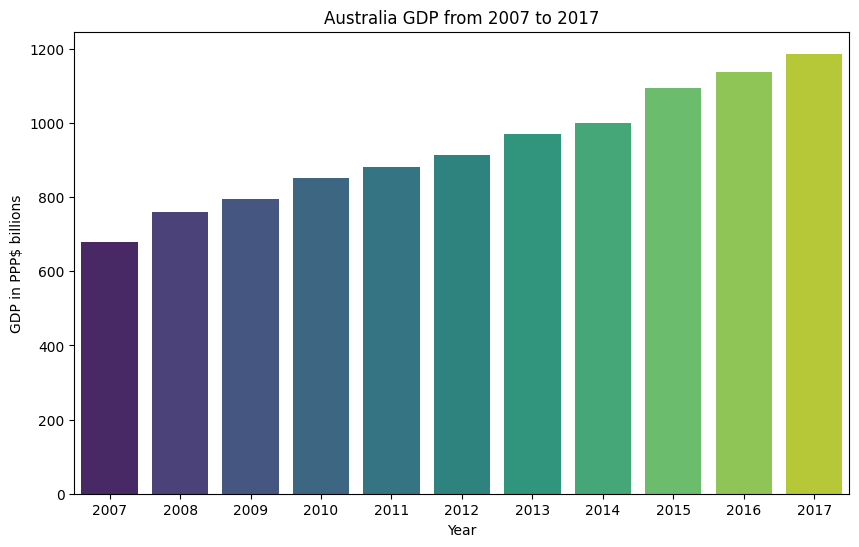

In [322]:
# Tracer le graphique en barres :
plt.figure(figsize=(10, 6))
sns.barplot(x='Year', y='GDP', data=australia_gdp, palette='viridis')

plt.title('Australia GDP from 2007 to 2017')
plt.ylabel('GDP in PPP$ billions')

plt.show()

# To do : Comprendre pourquoi 2007 et 2008 ont des ordres de grandeur abbérantes

### EDA Indicateurs économmiques

In [ ]:
# To do : EDA du DF Indicateurs économiques

In [19]:
df_economy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10758 entries, 0 to 10757
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Economy ISO3  10758 non-null  object 
 1   Economy Name  10758 non-null  object 
 2   Indicator ID  10758 non-null  object 
 3   Indicator     10758 non-null  object 
 4   Attribute 1   10758 non-null  object 
 5   Attribute 2   10758 non-null  object 
 6   Attribute 3   10758 non-null  object 
 7   Partner       10758 non-null  object 
 8   2007          9224 non-null   float64
 9   2008          9500 non-null   float64
 10  2009          9669 non-null   float64
 11  2010          10038 non-null  float64
 12  2011          10061 non-null  float64
 13  2012          10236 non-null  float64
 14  2013          10530 non-null  float64
 15  2014          10171 non-null  float64
 16  2015          10176 non-null  float64
 17  2016          10275 non-null  float64
 18  2017          10262 non-nu

# Analyse par pays

### Korea

#### Korea - Investissements énergie

In [372]:
# Filtre sur le pays pour avoir les postes d'investissement en énergie de 2007 à 2017
budgets_korea = budgets[budgets['Country'] == 'Korea']
budgets_korea = budgets_korea.drop(columns={'Currency', 'Country'})
budgets_korea

Technology     2007     2008     2009  \
792                          Energy efficiency  158.801  151.771  160.843   
793                               Fossil fuels  115.552   95.804  136.186   
794                                 Renewables  129.524   151.78  218.479   
795                                    Nuclear  410.286   112.09  130.563   
796                    Hydrogen and fuel cells   73.429  126.927   93.986   
797       Other power and storage technologies   47.995   88.623   120.67   
798  Other cross-cutting technologies/research        0   31.093   36.705   
799                                Unallocated        0        0        0   
800                               Total Budget  935.586  758.088  897.433   

        2010     2011      2012      2013      2014     2015     2016     2017  
792  166.444  152.633   189.883   173.239   173.883  175.284  181.952  224.707  
793  135.243   119.07   157.152   176.102   155.116  155.498   91.879   83.219  
794  274.846  246.099    289.01   276.769   254.233  226.701  242.974  220.966  
795  142.947  188.243   188.905   168.511   161.659  141.214  118.329  107.505  
796   86.056   78.814    58.779    58.193    48.524   45.597   59.593   59.251  
797  127.895  118.507    156.38   176.334   190.369  191.383  180.641  158.838  
798   44.504   35.314    25.254    37.007    35.923   41.864   48.828   52.997  
799        0        0         0         0         0        0        0        0  
800  977.935   938.68  1065.363  1066.156  1019.707   977.54  924.195  907.483

##### Répartition des investissements par type d'énergie pour une année donnée

In [219]:
# Focus uniquement sur 2017 pour sortir le pie chart de répartition des investissements 
columns_to_drop_korea = [str(year) for year in range(2007, 2017)]
budgets_korea_2017 = budgets_korea.drop(columns=columns_to_drop_korea)
budgets_korea_2017

Technology     2017
792                          Energy efficiency  224.707
793                               Fossil fuels   83.219
794                                 Renewables  220.966
795                                    Nuclear  107.505
796                    Hydrogen and fuel cells   59.251
797       Other power and storage technologies  158.838
798  Other cross-cutting technologies/research   52.997
799                                Unallocated        0
800                               Total Budget  907.483

In [220]:
# Drop des lignes total & unallocated > à voir en fonction des pays 
budgets_korea_2017 = budgets_korea_2017.head(7)
budgets_korea_2017

Technology     2017
792                          Energy efficiency  224.707
793                               Fossil fuels   83.219
794                                 Renewables  220.966
795                                    Nuclear  107.505
796                    Hydrogen and fuel cells   59.251
797       Other power and storage technologies  158.838
798  Other cross-cutting technologies/research   52.997

In [221]:
budgets_korea_2017.dtypes

Technology    object
2017          object
dtype: object

In [222]:
# Mise au bon format int pour les valeurs de l'année 2017 
budgets_korea_2017['2017'] = budgets_korea_2017['2017'].astype(int)
budgets_korea_2017

/var/folders/f0/kz3pcppd42x67vkzrt_f2f4w0000gn/T/ipykernel_11301/594342178.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets_korea_2017['2017'] = budgets_korea_2017['2017'].astype(int)


Technology  2017
792                          Energy efficiency   224
793                               Fossil fuels    83
794                                 Renewables   220
795                                    Nuclear   107
796                    Hydrogen and fuel cells    59
797       Other power and storage technologies   158
798  Other cross-cutting technologies/research    52

In [223]:
# Tri des valeurs par ordre décroissant 
budgets_korea_2017 = budgets_korea_2017.sort_values(by='2017', ascending=False)

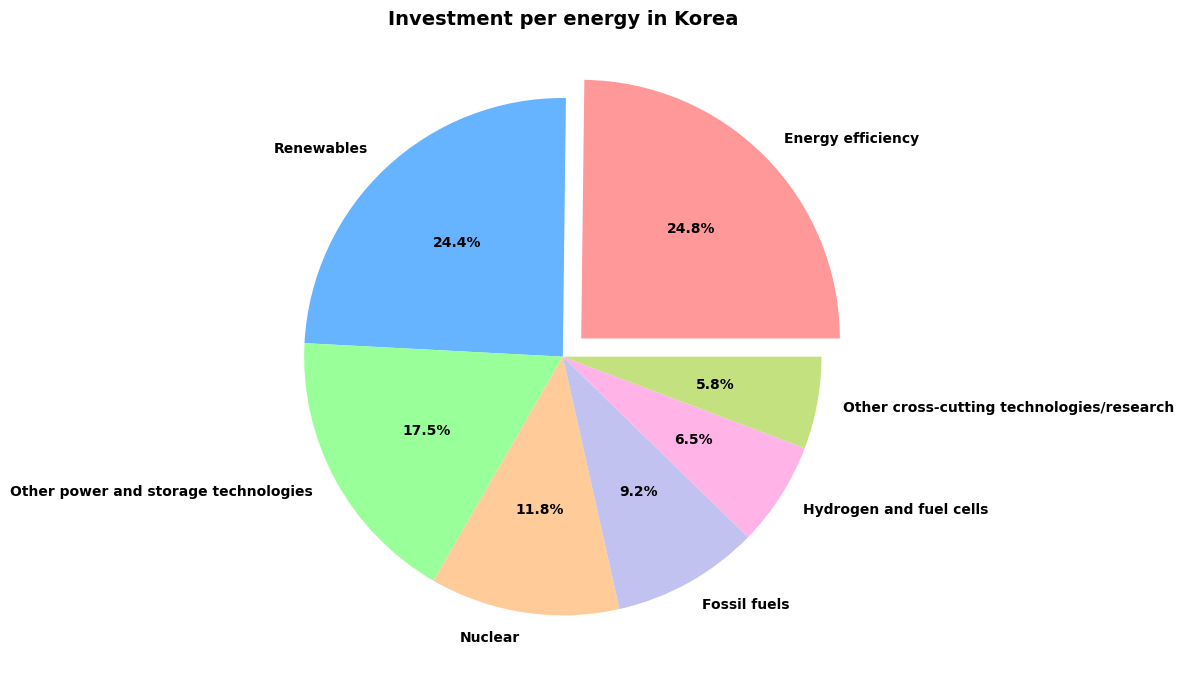

In [224]:
# Définir les données
sizes = budgets_korea_2017['2017']
labels = budgets_korea_2017['Technology']
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6','#c4e17f']
explode = [0.1 if size == max(sizes) else 0 for size in sizes]  # Explose seulement le plus grand segment

# Créer le graphique
plt.figure(figsize=(10, 7))
plt.pie(sizes, labels=labels, autopct='%0.1f%%', explode=explode, colors=colors, textprops={'weight': 'bold', 'fontsize': 10})
plt.title('Investment per energy in Korea', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

##### Evolution des investissements en énergie de 2007 à 2017

In [373]:
#retour au full années pour voir l'évolution des investissements sur la période complète et drop du total & unallocated > attention à voir en fonction du pays
budgets_korea

Technology     2007     2008     2009  \
792                          Energy efficiency  158.801  151.771  160.843   
793                               Fossil fuels  115.552   95.804  136.186   
794                                 Renewables  129.524   151.78  218.479   
795                                    Nuclear  410.286   112.09  130.563   
796                    Hydrogen and fuel cells   73.429  126.927   93.986   
797       Other power and storage technologies   47.995   88.623   120.67   
798  Other cross-cutting technologies/research        0   31.093   36.705   
799                                Unallocated        0        0        0   
800                               Total Budget  935.586  758.088  897.433   

        2010     2011      2012      2013      2014     2015     2016     2017  
792  166.444  152.633   189.883   173.239   173.883  175.284  181.952  224.707  
793  135.243   119.07   157.152   176.102   155.116  155.498   91.879   83.219  
794  274.846  246.099    289.01   276.769   254.233  226.701  242.974  220.966  
795  142.947  188.243   188.905   168.511   161.659  141.214  118.329  107.505  
796   86.056   78.814    58.779    58.193    48.524   45.597   59.593   59.251  
797  127.895  118.507    156.38   176.334   190.369  191.383  180.641  158.838  
798   44.504   35.314    25.254    37.007    35.923   41.864   48.828   52.997  
799        0        0         0         0         0        0        0        0  
800  977.935   938.68  1065.363  1066.156  1019.707   977.54  924.195  907.483

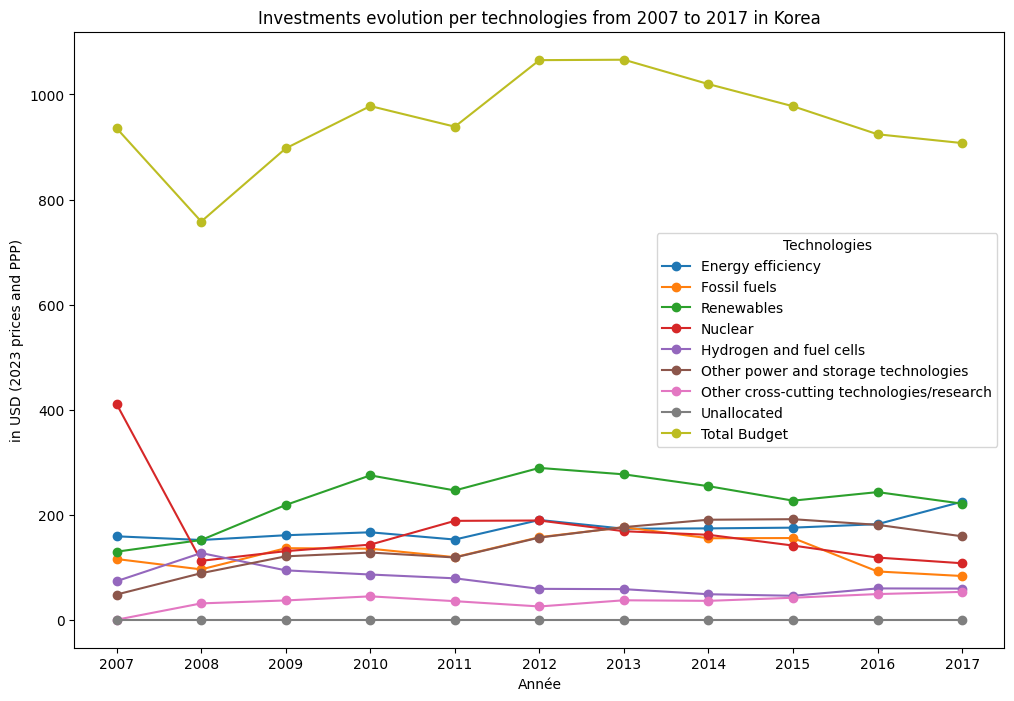

In [226]:
#graph dévolution des investissements 
# Mettre 'Technology' comme index
budgets_korea.set_index('Technology', inplace=True)

# Création du graphique en ligne
plt.figure(figsize=(12, 8))

for tech in budgets_korea.index:
    plt.plot(budgets_korea.columns, budgets_korea.loc[tech], marker='o', label=tech)

plt.title('Investments evolution per technologies from 2007 to 2017 in Korea')
plt.xlabel('Année')
plt.ylabel('in USD (2023 prices and PPP)')
plt.legend(title='Technologies')
plt.grid(False)
plt.show()

##### Répartition des investissements ER sur total inv énergie de 2007 à 2017

In [374]:
budgets_korea

Technology     2007     2008     2009  \
792                          Energy efficiency  158.801  151.771  160.843   
793                               Fossil fuels  115.552   95.804  136.186   
794                                 Renewables  129.524   151.78  218.479   
795                                    Nuclear  410.286   112.09  130.563   
796                    Hydrogen and fuel cells   73.429  126.927   93.986   
797       Other power and storage technologies   47.995   88.623   120.67   
798  Other cross-cutting technologies/research        0   31.093   36.705   
799                                Unallocated        0        0        0   
800                               Total Budget  935.586  758.088  897.433   

        2010     2011      2012      2013      2014     2015     2016     2017  
792  166.444  152.633   189.883   173.239   173.883  175.284  181.952  224.707  
793  135.243   119.07   157.152   176.102   155.116  155.498   91.879   83.219  
794  274.846  246.099    289.01   276.769   254.233  226.701  242.974  220.966  
795  142.947  188.243   188.905   168.511   161.659  141.214  118.329  107.505  
796   86.056   78.814    58.779    58.193    48.524   45.597   59.593   59.251  
797  127.895  118.507    156.38   176.334   190.369  191.383  180.641  158.838  
798   44.504   35.314    25.254    37.007    35.923   41.864   48.828   52.997  
799        0        0         0         0         0        0        0        0  
800  977.935   938.68  1065.363  1066.156  1019.707   977.54  924.195  907.483

In [375]:
Technology_a_conserver = ['Renewables', 'Total Budget']

budgets_korea_ERtot = budgets_korea[budgets_korea['Technology'].isin(Technology_a_conserver)]
budgets_korea_ERtot

Technology     2007     2008     2009     2010     2011      2012  \
794    Renewables  129.524   151.78  218.479  274.846  246.099    289.01   
800  Total Budget  935.586  758.088  897.433  977.935   938.68  1065.363   

         2013      2014     2015     2016     2017  
794   276.769   254.233  226.701  242.974  220.966  
800  1066.156  1019.707   977.54  924.195  907.483

In [376]:
budgets_korea_ERtot.dtypes

Technology    object
2007          object
2008          object
2009          object
2010          object
2011          object
2012          object
2013          object
2014          object
2015          object
2016          object
2017          object
dtype: object

In [377]:
colonne_to_float = ['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']

In [378]:
budgets_korea_ERtot[colonne_to_float] = budgets_korea_ERtot[colonne_to_float].astype(float)

/var/folders/f0/kz3pcppd42x67vkzrt_f2f4w0000gn/T/ipykernel_11301/4214996569.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  budgets_korea_ERtot[colonne_to_float] = budgets_korea_ERtot[colonne_to_float].astype(float)


In [379]:
budgets_korea_ERtot.dtypes

Technology     object
2007          float64
2008          float64
2009          float64
2010          float64
2011          float64
2012          float64
2013          float64
2014          float64
2015          float64
2016          float64
2017          float64
dtype: object

In [382]:
budgets_korea_ERtot.set_index('Technology', inplace= True)

In [383]:
budgets_korea_ERtot2 = budgets_korea_ERtot.T
budgets_korea_ERtot2

Technology  Renewables  Total Budget
2007           129.524       935.586
2008           151.780       758.088
2009           218.479       897.433
2010           274.846       977.935
2011           246.099       938.680
2012           289.010      1065.363
2013           276.769      1066.156
2014           254.233      1019.707
2015           226.701       977.540
2016           242.974       924.195
2017           220.966       907.483

In [384]:
# Calculer la part des renouvelables et des autres pour chaque année
budgets_korea_ERtot2['Non-Renewables'] = budgets_korea_ERtot2['Total Budget'] - budgets_korea_ERtot2['Renewables']

KeyError: 'Total Budget'

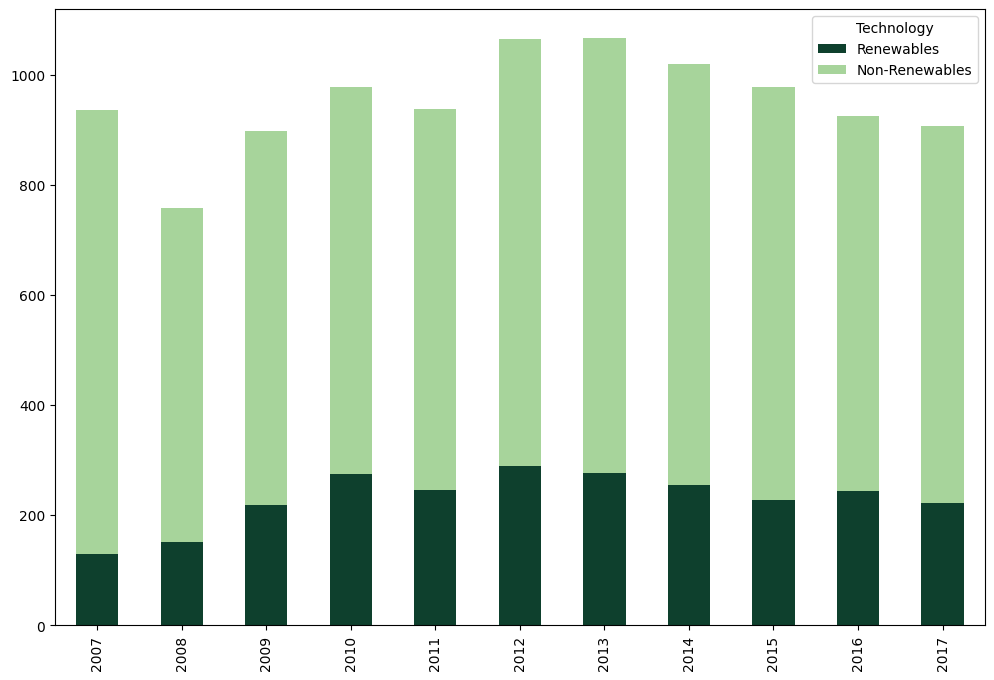

In [385]:
# Création de la figure et des axes
fig, ax = plt.subplots(figsize=(12, 8))

# Tracer les barres empilées
budgets_korea_ERtot2[['Renewables', 'Non-Renewables']].plot(kind='bar', stacked=True, ax=ax, color=['#0E402D', '#A7D49B'])

# Ajouter les annotations pour les pourcentages des renouvelables
for idx, row in df.iterrows():
    total = row['Total Budget']
    renewables = row['Renewables']
    percentage = renewables / total * 100
    ax.text(idx, renewables + total * 0.01, f'{percentage:.1f}%', ha='center', va='bottom', fontsize=10, color='black')

# Configuration des étiquettes et du titre
ax.set_xlabel('Année') 
ax.set_ylabel('Budget (en millions)')
ax.set_title('Budget total avec la part des renouvelables (2007-2017)')
ax.legend(['Renouvelables', 'Non-renouvelables'], loc='upper left')

plt.xticks(rotation=30)
plt.yticks(rotation=30)
plt.tight_layout()
plt.show()

#### Korea - Economie

In [161]:
df_economy_korea = df_economy[(df_economy['Economy Name'] == 'Korea, Rep.') & (df_economy['Attribute 1'] == 'Value')]
df_economy_korea

Economy ISO3 Economy Name            Indicator ID  \
6521          KOR  Korea, Rep.     WEF.GCIHH.AIRSEATKM   
6523          KOR  Korea, Rep.       WEF.GCIHH.BBSUBPC   
6525          KOR  Korea, Rep.      WEF.GCIHH.BRIBEIDX   
6527          KOR  Korea, Rep.      WEF.GCIHH.CCRATING   
6529          KOR  Korea, Rep.   WEF.GCIHH.CORPTAXRATE   
...           ...          ...                     ...   
6837          KOR  Korea, Rep.      WEF.GCIHH.SHRGDPWL   
6839          KOR  Korea, Rep.  WEF.GCIHH.STARTBUSDAYS   
6841          KOR  Korea, Rep.  WEF.GCIHH.STARTBUSPROC   
6843          KOR  Korea, Rep.          WEF.GCIHH.TBPC   
6845          KOR  Korea, Rep.        WEF.GCIHH.TFDUTY   

                                            Indicator Attribute 1 Attribute 2  \
6521         Available airline seat km/week, millions       Value           -   
6523  Fixed broadband Internet subscriptions/100 pop.       Value           -   
6525        Irregular payments and bribes, 1-7 (best)       Value           -   
6527              Country credit rating, 0-100 (best)       Value           -   
6529                        Total tax rate, % profits       Value           -   
...                                               ...         ...         ...   
6837            GDP (PPP) as share (%) of world total       Value           -   
6839                     No. days to start a business       Value           -   
6841               No. procedures to start a business       Value           -   
6843                  Tuberculosis cases/100,000 pop.       Value           -   
6845                            Trade tariffs, % duty       Value           -   

     Attribute 3 Partner     2007     2008     2009     2010     2011  \
6521           -       -  1588.43  1701.26  1647.86  1665.34  1920.23   
6523           -       -    25.24    29.27    31.98    33.82    36.63   
6525           -       -      NaN      NaN      NaN     4.62     4.52   
6527           -       -      NaN      NaN      NaN      NaN      NaN   
6529           -       -    30.90    34.90    33.70    31.90    29.80   
...          ...     ...      ...      ...      ...      ...      ...   
6837           -       -      NaN     1.85     1.85     1.94     1.97   
6839           -       -    22.00    17.00    17.00    14.00    14.00   
6841           -       -    12.00    10.00    10.00     8.00     8.00   
6843           -       -    96.41    88.00    90.00    88.00    90.00   
6845           -       -     8.00     9.85     8.03     6.55     7.24   

         2012     2013     2014     2015     2016     2017  
6521  2090.81  2167.37  2293.07  2445.99  2631.01  2830.55  
6523    36.91    37.56    38.04    38.78    40.25    41.13  
6525     4.44     4.35     4.39     4.48     4.45     4.67  
6527      NaN      NaN      NaN      NaN      NaN    81.69  
6529    29.70    29.80    27.90    32.40    33.20    33.10  
...       ...      ...      ...      ...      ...      ...  
6837     1.97     1.94      NaN      NaN      NaN      NaN  
6839     7.00     7.00     5.50     4.00     4.00     4.00  
6841     5.00     5.00     5.00     3.00     3.00     2.00  
6843    97.00   100.00   108.00    97.00    86.00    80.00  
6845     8.52     8.60     8.50     6.78     7.08     7.20  

[163 rows x 19 columns]

In [162]:
# Clean DF des colonnes inutiles
df_economy_korea = df_economy_korea.drop(columns=["Economy ISO3", "Economy Name", "Indicator ID", "Attribute 1", "Attribute 2", "Attribute 3", "Partner"])
df_economy_korea

Indicator     2007     2008  \
6521         Available airline seat km/week, millions  1588.43  1701.26   
6523  Fixed broadband Internet subscriptions/100 pop.    25.24    29.27   
6525        Irregular payments and bribes, 1-7 (best)      NaN      NaN   
6527              Country credit rating, 0-100 (best)      NaN      NaN   
6529                        Total tax rate, % profits    30.90    34.90   
...                                               ...      ...      ...   
6837            GDP (PPP) as share (%) of world total      NaN     1.85   
6839                     No. days to start a business    22.00    17.00   
6841               No. procedures to start a business    12.00    10.00   
6843                  Tuberculosis cases/100,000 pop.    96.41    88.00   
6845                            Trade tariffs, % duty     8.00     9.85   

         2009     2010     2011     2012     2013     2014     2015     2016  \
6521  1647.86  1665.34  1920.23  2090.81  2167.37  2293.07  2445.99  2631.01   
6523    31.98    33.82    36.63    36.91    37.56    38.04    38.78    40.25   
6525      NaN     4.62     4.52     4.44     4.35     4.39     4.48     4.45   
6527      NaN      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
6529    33.70    31.90    29.80    29.70    29.80    27.90    32.40    33.20   
...       ...      ...      ...      ...      ...      ...      ...      ...   
6837     1.85     1.94     1.97     1.97     1.94      NaN      NaN      NaN   
6839    17.00    14.00    14.00     7.00     7.00     5.50     4.00     4.00   
6841    10.00     8.00     8.00     5.00     5.00     5.00     3.00     3.00   
6843    90.00    88.00    90.00    97.00   100.00   108.00    97.00    86.00   
6845     8.03     6.55     7.24     8.52     8.60     8.50     6.78     7.08   

         2017  
6521  2830.55  
6523    41.13  
6525     4.67  
6527    81.69  
6529    33.10  
...       ...  
6837      NaN  
6839     4.00  
6841     2.00  
6843    80.00  
6845     7.20  

[163 rows x 12 columns]

##### Evolution GDP (PPP$ billions) 2007 to 2017

In [182]:
df_economy_korea_gdp = df_economy_korea[df_economy_korea['Indicator'] == 'GDP (PPP$ billions)']
df_economy_korea_gdp

Indicator       2007       2008     2009     2010     2011  \
6799  GDP (PPP$ billions)  1155565.0  1200879.0  1342.34  1364.15  1459.25   

         2012     2013     2014     2015     2016     2017  
6799  1554.15  1613.92  1666.76  1778.82  1848.52  1934.03

In [183]:
# Diviser les valeurs des colonnes 2007 et 2008 par 100 pour corriger l'ordre de grandeur constaté sur ces 2 années
df_economy_korea_gdp['2007'] = df_economy_korea_gdp['2007'] / 1000
df_economy_korea_gdp['2008'] = df_economy_korea_gdp['2008'] / 1000

/var/folders/f0/kz3pcppd42x67vkzrt_f2f4w0000gn/T/ipykernel_11301/261254661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_economy_korea_gdp['2007'] = df_economy_korea_gdp['2007'] / 1000
/var/folders/f0/kz3pcppd42x67vkzrt_f2f4w0000gn/T/ipykernel_11301/261254661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_economy_korea_gdp['2008'] = df_economy_korea_gdp['2008'] / 1000


In [192]:
# Vérifier que les valeurs 2007 et 2008 sont bien corrigées
df_economy_korea_gdp

Indicator      2007      2008     2009     2010     2011  \
6799  GDP (PPP$ billions)  1155.565  1200.879  1342.34  1364.15  1459.25   

         2012     2013     2014     2015     2016     2017  
6799  1554.15  1613.92  1666.76  1778.82  1848.52  1934.03

In [193]:
# Transposer le DataFrame pour faciliter le traçage
df_economy_korea_gdp_t = df_economy_korea_gdp.set_index('Indicator').T
df_economy_korea_gdp_t.index.name = 'Year'
df_economy_korea_gdp_t.reset_index(inplace=True)

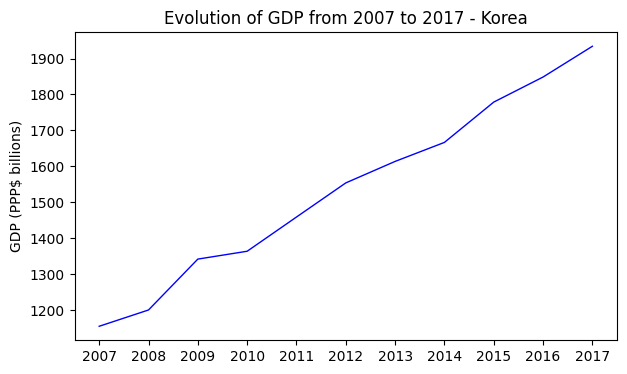

In [201]:
# Tracer le graphique en lignes
plt.figure(figsize=(7, 4))
plt.plot(df_economy_korea_gdp_t['Year'], df_economy_korea_gdp_t['GDP (PPP$ billions)'], linestyle='-', color='blue', linewidth=1)

# Ajouter des étiquettes et un titre
plt.ylabel('GDP (PPP$ billions)')
plt.title('Evolution of GDP from 2007 to 2017 - Korea')

# Afficher le graphique
plt.grid(False)
plt.show()

In [ ]:
# Ajouter des étiquettes et un titre
plt.xlabel('Year')
plt.ylabel('GDP (PPP$ billions)')
plt.title('Evolution of GDP from 2007 to 2017')

# Afficher le graphique
plt.show()

In [104]:
# Liste des indicateurs que je souhaite conserver
indicators_to_keep = [
    "1st pillar: Institutions",
    "2nd pillar: Infrastructure",
    "3rd pillar: Macroeconomic environment",
    "4th pillar: Health and primary education",
    "5th pillar: Higher education and training",
    "6th pillar: Goods market efficiency",
    "7th pillar: Labor market efficiency",
    "8th pillar: Financial market development",
    "9th pillar: Technological readiness",
    "10th pillar: Market size",
    "11th pillar: Business sophistication",
    "12th pillar: Innovation",
    #"GDP (PPP$ billions)"
]


In [105]:
# Dataframe Korea avec uniquement les indicateurs qui m'intéressent
df_economy_korea = df_economy_korea.loc[df_economy_korea['Indicator'].isin(indicators_to_keep)]
df_economy_korea

Indicator  2007  2008  2009  2010  2011  \
6711                   1st pillar: Institutions  5.05  4.95  4.23  3.98  3.89   
6731                 2nd pillar: Infrastructure  5.55  5.63  5.60  5.59  5.94   
6737      3rd pillar: Macroeconomic environment  6.00  6.15  5.80  5.76  6.37   
6739   4th pillar: Health and primary education  6.08  6.10  5.99  6.34  6.38   
6747  5th pillar: Higher education and training  5.65  5.51  5.24  5.42  5.44   
6755        6th pillar: Goods market efficiency  5.23  5.00  4.64  4.55  4.57   
6765        7th pillar: Labor market efficiency  4.79  4.60  4.22  4.27  4.30   
6771   8th pillar: Financial market development  5.15  4.85  4.36  3.99  3.95   
6777        9th pillar: Technological readiness  5.46  5.51  5.50  5.05  5.33   
6783                   10th pillar: Market size  5.37  5.44  5.56  5.56  5.57   
6791       11th pillar: Business sophistication  5.47  5.22  4.91  4.81  4.86   
6793                    12th pillar: Innovation  5.36  5.18  4.84  4.81  4.89   

      2012  2013  2014  2015  2016  2017  
6711  3.98  3.84  3.70  3.90  4.02  4.04  
6731  5.92  5.85  5.74  5.82  5.96  6.08  
6737  6.25  6.32  6.44  6.58  6.58  6.63  
6739  6.49  6.37  6.31  6.34  6.28  6.34  
6747  5.52  5.41  5.38  5.36  5.32  5.34  
6755  4.75  4.68  4.70  4.81  4.93  4.97  
6765  4.35  4.21  4.07  4.08  4.14  4.18  
6771  4.06  3.89  3.81  3.60  3.86  3.90  
6777  5.70  5.57  5.42  5.50  5.54  5.65  
6783  5.60  5.61  5.60  5.56  5.51  5.53  
6791  4.99  4.86  4.73  4.80  4.87  4.91  
6793  4.94  4.78  4.83  4.83  4.75  4.78

##### Pilliers 2007 versus 2017

In [128]:
# Extraire les données pour les années 2007 et 2017
data_2007 = df_economy_korea['2007']
data_2017 = df_economy_korea['2017']
indicators = df_economy_korea['Indicator']

In [132]:
# Trier le DataFrame par les valeurs de 2007
df_economy_korea_sorted = df_economy_korea.sort_values(by='2007', ascending=False)
df_economy_korea_sorted

Indicator  2007  2008  2009  2010  2011  \
6739   4th pillar: Health and primary education  6.08  6.10  5.99  6.34  6.38   
6737      3rd pillar: Macroeconomic environment  6.00  6.15  5.80  5.76  6.37   
6747  5th pillar: Higher education and training  5.65  5.51  5.24  5.42  5.44   
6731                 2nd pillar: Infrastructure  5.55  5.63  5.60  5.59  5.94   
6791       11th pillar: Business sophistication  5.47  5.22  4.91  4.81  4.86   
6777        9th pillar: Technological readiness  5.46  5.51  5.50  5.05  5.33   
6783                   10th pillar: Market size  5.37  5.44  5.56  5.56  5.57   
6793                    12th pillar: Innovation  5.36  5.18  4.84  4.81  4.89   
6755        6th pillar: Goods market efficiency  5.23  5.00  4.64  4.55  4.57   
6771   8th pillar: Financial market development  5.15  4.85  4.36  3.99  3.95   
6711                   1st pillar: Institutions  5.05  4.95  4.23  3.98  3.89   
6765        7th pillar: Labor market efficiency  4.79  4.60  4.22  4.27  4.30   

      2012  2013  2014  2015  2016  2017  
6739  6.49  6.37  6.31  6.34  6.28  6.34  
6737  6.25  6.32  6.44  6.58  6.58  6.63  
6747  5.52  5.41  5.38  5.36  5.32  5.34  
6731  5.92  5.85  5.74  5.82  5.96  6.08  
6791  4.99  4.86  4.73  4.80  4.87  4.91  
6777  5.70  5.57  5.42  5.50  5.54  5.65  
6783  5.60  5.61  5.60  5.56  5.51  5.53  
6793  4.94  4.78  4.83  4.83  4.75  4.78  
6755  4.75  4.68  4.70  4.81  4.93  4.97  
6771  4.06  3.89  3.81  3.60  3.86  3.90  
6711  3.98  3.84  3.70  3.90  4.02  4.04  
6765  4.35  4.21  4.07  4.08  4.14  4.18

In [133]:
# Extraire les données triées pour les années 2007
data_2007 = df_economy_korea_sorted['2007']
indicators = df_economy_korea_sorted['Indicator']

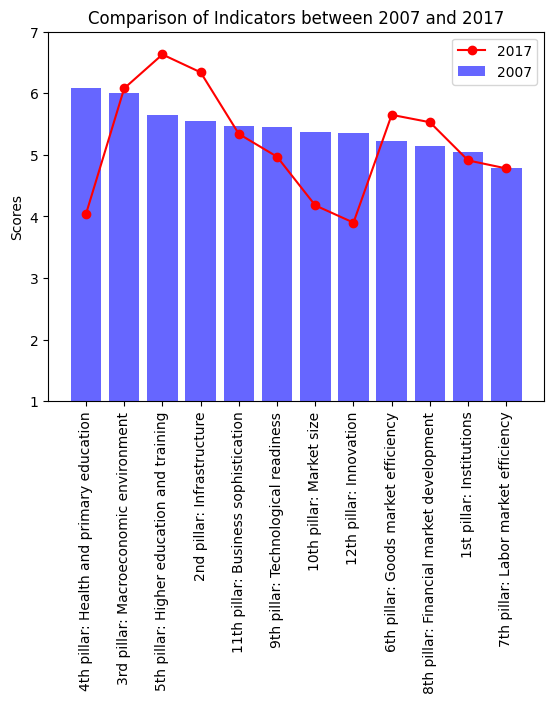

In [216]:
# Créer le graphique
fig, ax = plt.subplots()

# Créer l'histogramme pour l'année 2007
ax.bar(indicators, data_2007, color='b', alpha=0.6, label='2007')

# Ajouter une courbe pour l'année 2017
ax.plot(indicators, data_2017, color='r', marker='o', label='2017')

# Définir les limites de l'axe Y de 1 à 7
ax.set_ylim(1, 7)

# Ajouter des étiquettes et un titre
#ax.set_xlabel('Indicator')
ax.set_ylabel('Scores')
ax.set_title('Comparison of Indicators between 2007 and 2017')
ax.tick_params(axis='x', rotation=90)

# Ajouter une légende
ax.legend()


# Afficher le graphique
plt.show()

##### Pilliers comparatif au meilleur et moins bon pays sur une année donnée

In [386]:
df_economy_gdp

Economy Name      2007      2008      2009      2010      2011  \
279          Australia    680.15    760.81    795.30    851.17    882.36   
605            Austria    297.73    317.81    328.57    322.51    332.00   
931            Belgium    364.65    375.99    389.52    382.75    394.35   
1257            Brazil   1701.18   1835.64   1981.21   2013.19   2172.06   
1583            Canada   1156.46   1265.84   1303.23   1281.06   1330.27   
1909       Switzerland    272.30    300.19    312.75    314.87    324.51   
2235             Chile    212.67    231.06    243.04    243.57    257.88   
2561           Czechia    236.54    248.90    262.17    252.95    261.29   
2887           Germany   2558.91   2809.69   2910.49   2806.27   2940.43   
3213           Denmark    198.37    203.68    204.06    197.06    201.74   
3539             Spain   1214.93   1351.61   1396.88   1360.60   1368.64   
3865           Estonia     24.49     28.32     27.21     24.00     24.69   
4191           Finland    182.63    185.48    190.86    179.60    185.98   
4517            France   1934.68   2046.90   2130.38   2108.23   2145.49   
4843    United Kingdom   2121.77   2137.42   2230.55   2139.40   2172.77   
5169            Greece    289.48    324.62    341.13    333.53    318.08   
5495           Hungary    197.09    191.32    196.07    185.87    187.63   
5821           Ireland    186.70    186.17    188.11    175.06    172.34   
6147             Italy   1790.90   1786.43   1814.56   1740.12   1773.55   
6473             Japan   4170.53   4289.81   4354.37   4159.43   4309.53   
6799       Korea, Rep.   1155.56   1200.88   1342.34   1364.15   1459.25   
7125         Lithuania     54.86     59.64     63.62     55.16     56.59   
7451        Luxembourg     37.12     38.56     40.02     38.81     41.09   
7777            Mexico   1171.51   1346.01   1548.01   1465.73   1567.47   
8103       Netherlands    573.33    639.51    675.38    658.23    676.90   
8429            Norway    202.06    247.42    256.52    254.54    255.28   
8755       New Zealand    105.82    111.72    115.71    115.41    117.81   
9081            Poland    566.89    620.87    666.05    688.76    721.32   
9407          Portugal    239.47    230.55    235.90    232.66    247.04   
9733   Slovak Republic     95.02    109.59    119.27    115.10    120.17   
10059           Sweden    312.81    334.64    341.87    331.50    354.72   
10385          Turkiye    660.84    887.96    915.18    880.06    960.51   
10711    United States  13020.86  13843.82  14264.60  14256.28  14657.80   

           2012      2013      2014      2015      2016      2017  
279      914.48    970.76    999.60   1095.38   1138.08   1187.32  
605      352.02    359.02    361.40    395.49    404.29    417.23  
931      413.28    420.31    422.81    481.47    494.12    509.53  
1257    2294.24   2355.59   2423.31   3263.83   3192.40   3141.33  
1583    1396.13   1488.31   1526.08   1591.58   1631.94   1682.36  
1909     339.89    363.42    371.57    472.83    482.35    495.96  
2235     299.63    320.54    334.76    409.33    422.42    438.75  
2561     284.95    286.95    286.04    314.58    332.48    350.72  
2887    3099.08   3197.07   3232.54   3721.55   3840.55   3980.28  
3213     206.59    210.15    211.92    249.53    258.70    273.86  
3539    1413.47   1410.63   1391.35   1566.37   1615.07   1686.89  
3865      27.31     29.09     29.77     35.62     37.55     38.45  
4191     195.72    197.48    194.16    221.04    225.00    231.37  
4517    2217.90   2254.07   2278.00   2580.75   2646.89   2733.68  
4843    2260.80   2336.30   2390.87   2548.89   2679.32   2785.56  
5169     294.34    276.88    265.63    284.26    285.98    289.40  
5495     195.64    195.63    198.22    246.35    258.44    270.29  
5821     181.60    192.22    188.88    226.77    257.42    324.90  
6147    1846.95   1832.92   1807.83   2127.74   2170.91   2234.50  
6473    4440.38   4627.89   4698.80   4750.77   4830.06   5237.79

In [387]:
columns_to_drop = [str(year) for year in range(2007, 2017)]
df_economy_gdp_2017 = df_economy_gdp.drop(columns=columns_to_drop)
df_economy_gdp_2017

Economy Name      2017
279          Australia   1187.32
605            Austria    417.23
931            Belgium    509.53
1257            Brazil   3141.33
1583            Canada   1682.36
1909       Switzerland    495.96
2235             Chile    438.75
2561           Czechia    350.72
2887           Germany   3980.28
3213           Denmark    273.86
3539             Spain   1686.89
3865           Estonia     38.45
4191           Finland    231.37
4517            France   2733.68
4843    United Kingdom   2785.56
5169            Greece    289.40
5495           Hungary    270.29
5821           Ireland    324.90
6147             Italy   2234.50
6473             Japan   5237.79
6799       Korea, Rep.   1934.03
7125         Lithuania     86.05
7451        Luxembourg     59.93
7777            Mexico   2315.65
8103       Netherlands    869.36
8429            Norway    364.44
8755       New Zealand    177.00
9081            Poland   1054.13
9407          Portugal    298.74
9733   Slovak Republic    170.05
10059           Sweden    498.12
10385          Turkiye   1988.33
10711    United States  18569.10

In [ ]:
df_economy_gdp_2017.sort_values(by="2017", ascending=False)
# USA est le premier pays en GDP 
# Estonie le moins bon

# Analyse globale

### Dataframes

#### Dataframe GDP par pays de 2007 à 2017

In [230]:
# GDP par pays de 2007 à 2008
df_economy_gdp

Economy Name      2007      2008      2009      2010      2011  \
279          Australia    680.15    760.81    795.30    851.17    882.36   
605            Austria    297.73    317.81    328.57    322.51    332.00   
931            Belgium    364.65    375.99    389.52    382.75    394.35   
1257            Brazil   1701.18   1835.64   1981.21   2013.19   2172.06   
1583            Canada   1156.46   1265.84   1303.23   1281.06   1330.27   
1909       Switzerland    272.30    300.19    312.75    314.87    324.51   
2235             Chile    212.67    231.06    243.04    243.57    257.88   
2561           Czechia    236.54    248.90    262.17    252.95    261.29   
2887           Germany   2558.91   2809.69   2910.49   2806.27   2940.43   
3213           Denmark    198.37    203.68    204.06    197.06    201.74   
3539             Spain   1214.93   1351.61   1396.88   1360.60   1368.64   
3865           Estonia     24.49     28.32     27.21     24.00     24.69   
4191           Finland    182.63    185.48    190.86    179.60    185.98   
4517            France   1934.68   2046.90   2130.38   2108.23   2145.49   
4843    United Kingdom   2121.77   2137.42   2230.55   2139.40   2172.77   
5169            Greece    289.48    324.62    341.13    333.53    318.08   
5495           Hungary    197.09    191.32    196.07    185.87    187.63   
5821           Ireland    186.70    186.17    188.11    175.06    172.34   
6147             Italy   1790.90   1786.43   1814.56   1740.12   1773.55   
6473             Japan   4170.53   4289.81   4354.37   4159.43   4309.53   
6799       Korea, Rep.   1155.56   1200.88   1342.34   1364.15   1459.25   
7125         Lithuania     54.86     59.64     63.62     55.16     56.59   
7451        Luxembourg     37.12     38.56     40.02     38.81     41.09   
7777            Mexico   1171.51   1346.01   1548.01   1465.73   1567.47   
8103       Netherlands    573.33    639.51    675.38    658.23    676.90   
8429            Norway    202.06    247.42    256.52    254.54    255.28   
8755       New Zealand    105.82    111.72    115.71    115.41    117.81   
9081            Poland    566.89    620.87    666.05    688.76    721.32   
9407          Portugal    239.47    230.55    235.90    232.66    247.04   
9733   Slovak Republic     95.02    109.59    119.27    115.10    120.17   
10059           Sweden    312.81    334.64    341.87    331.50    354.72   
10385          Turkiye    660.84    887.96    915.18    880.06    960.51   
10711    United States  13020.86  13843.82  14264.60  14256.28  14657.80   

           2012      2013      2014      2015      2016      2017  
279      914.48    970.76    999.60   1095.38   1138.08   1187.32  
605      352.02    359.02    361.40    395.49    404.29    417.23  
931      413.28    420.31    422.81    481.47    494.12    509.53  
1257    2294.24   2355.59   2423.31   3263.83   3192.40   3141.33  
1583    1396.13   1488.31   1526.08   1591.58   1631.94   1682.36  
1909     339.89    363.42    371.57    472.83    482.35    495.96  
2235     299.63    320.54    334.76    409.33    422.42    438.75  
2561     284.95    286.95    286.04    314.58    332.48    350.72  
2887    3099.08   3197.07   3232.54   3721.55   3840.55   3980.28  
3213     206.59    210.15    211.92    249.53    258.70    273.86  
3539    1413.47   1410.63   1391.35   1566.37   1615.07   1686.89  
3865      27.31     29.09     29.77     35.62     37.55     38.45  
4191     195.72    197.48    194.16    221.04    225.00    231.37  
4517    2217.90   2254.07   2278.00   2580.75   2646.89   2733.68  
4843    2260.80   2336.30   2390.87   2548.89   2679.32   2785.56  
5169     294.34    276.88    265.63    284.26    285.98    289.40  
5495     195.64    195.63    198.22    246.35    258.44    270.29  
5821     181.60    192.22    188.88    226.77    257.42    324.90  
6147    1846.95   1832.92   1807.83   2127.74   2170.91   2234.50  
6473    4440.38   4627.89   4698.80   4750.77   4830.06   5237.79

#### Dataframe GCI moyen par pays de 2007 à 2017

In [231]:
# Sélection des 12 pilliers à conserver pour l'étude
selected_indicators = [
    '1st pillar: Institutions',
    '2nd pillar: Infrastructure',
    '3rd pillar: Macroeconomic environment',
    '4th pillar: Health and primary education',
    '5th pillar: Higher education and training',
    '6th pillar: Goods market efficiency',
    '7th pillar: Labor market efficiency',
    '8th pillar: Financial market development',
    '9th pillar: Technological readiness',
    '10th pillar: Market size',
    '11th pillar: Business sophistication',
    '12th pillar: Innovation'
]

In [232]:
# Filtrer le DataFrame pour inclure uniquement les indicateurs sélectionnés (12 pilliers) et les valeurs (pas rank)
df_gci = df_economy[
    (df_economy['Indicator'].isin(selected_indicators)) & 
    (df_economy['Attribute 1'] == "Value")
]

In [234]:
# Clean DF des colonnes inutiles
df_gci = df_gci.drop(columns=["Economy ISO3", "Indicator ID", "Attribute 1", "Attribute 2", "Attribute 3", "Partner"])
df_gci

Economy Name                                  Indicator  2007  2008  \
191        Australia                   1st pillar: Institutions  5.66  5.72   
211        Australia                 2nd pillar: Infrastructure  5.53  5.33   
217        Australia      3rd pillar: Macroeconomic environment  5.39  5.66   
219        Australia   4th pillar: Health and primary education  6.26  6.27   
227        Australia  5th pillar: Higher education and training  5.46  5.44   
...              ...                                        ...   ...   ...   
10683  United States   8th pillar: Financial market development  5.68  5.61   
10689  United States        9th pillar: Technological readiness  5.43  5.57   
10695  United States                   10th pillar: Market size  6.83  6.91   
10703  United States       11th pillar: Business sophistication  5.60  5.75   
10705  United States                    12th pillar: Innovation  5.77  5.84   

       2009  2010  2011  2012  2013  2014  2015  2016  2017  
191    5.60  5.49  5.39  5.27  5.04  5.14  5.31  5.32  5.35  
211    5.19  5.44  5.43  5.70  5.60  5.60  5.66  5.65  5.27  
217    5.56  5.55  5.62  5.57  5.75  5.61  5.62  5.69  5.67  
219    6.18  6.49  6.51  6.46  6.36  6.46  6.54  6.56  6.52  
227    5.33  5.53  5.62  5.64  5.51  5.67  5.84  5.91  5.88  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
10683  4.96  4.67  4.87  5.07  5.26  5.35  5.45  5.56  5.73  
10689  5.61  5.10  5.23  5.84  5.72  5.78  5.85  6.02  6.23  
10695  6.93  6.93  6.92  6.93  6.94  6.94  6.91  6.90  6.86  
10703  5.65  5.40  5.35  5.34  5.49  5.58  5.60  5.62  5.77  
10705  5.77  5.65  5.57  5.50  5.37  5.49  5.58  5.64  5.82  

[396 rows x 13 columns]

In [352]:
df_gci

Economy Name                                  Indicator  2007  2008  \
191        Australia                   1st pillar: Institutions  5.66  5.72   
211        Australia                 2nd pillar: Infrastructure  5.53  5.33   
217        Australia      3rd pillar: Macroeconomic environment  5.39  5.66   
219        Australia   4th pillar: Health and primary education  6.26  6.27   
227        Australia  5th pillar: Higher education and training  5.46  5.44   
...              ...                                        ...   ...   ...   
10683  United States   8th pillar: Financial market development  5.68  5.61   
10689  United States        9th pillar: Technological readiness  5.43  5.57   
10695  United States                   10th pillar: Market size  6.83  6.91   
10703  United States       11th pillar: Business sophistication  5.60  5.75   
10705  United States                    12th pillar: Innovation  5.77  5.84   

       2009  2010  2011  2012  2013  2014  2015  2016  2017  
191    5.60  5.49  5.39  5.27  5.04  5.14  5.31  5.32  5.35  
211    5.19  5.44  5.43  5.70  5.60  5.60  5.66  5.65  5.27  
217    5.56  5.55  5.62  5.57  5.75  5.61  5.62  5.69  5.67  
219    6.18  6.49  6.51  6.46  6.36  6.46  6.54  6.56  6.52  
227    5.33  5.53  5.62  5.64  5.51  5.67  5.84  5.91  5.88  
...     ...   ...   ...   ...   ...   ...   ...   ...   ...  
10683  4.96  4.67  4.87  5.07  5.26  5.35  5.45  5.56  5.73  
10689  5.61  5.10  5.23  5.84  5.72  5.78  5.85  6.02  6.23  
10695  6.93  6.93  6.92  6.93  6.94  6.94  6.91  6.90  6.86  
10703  5.65  5.40  5.35  5.34  5.49  5.58  5.60  5.62  5.77  
10705  5.77  5.65  5.57  5.50  5.37  5.49  5.58  5.64  5.82  

[396 rows x 13 columns]

In [252]:
# Sélectionner les colonnes des années (de 2007 à 2017)
years = [str(year) for year in range(2007, 2018)]

In [254]:
# Grouper par 'Economy Name' et calculer la moyenne pour chaque groupe sur les années spécifiées
df_gci_mean_country = df_gci.groupby('Economy Name')[years].mean().reset_index()
df_gci_mean_country

Economy Name      2007      2008      2009      2010      2011  \
0         Australia  5.317500  5.345000  5.290000  5.272500  5.265833   
1           Austria  5.297500  5.314167  5.225000  5.181667  5.207500   
2           Belgium  5.153333  5.215000  5.155833  5.142500  5.268333   
3            Brazil  3.996667  4.137500  4.230833  4.267500  4.314167   
4            Canada  5.439167  5.491667  5.435000  5.411667  5.437500   
5             Chile  4.692500  4.670000  4.650833  4.625833  4.710000   
6           Czechia  4.606667  4.683333  4.715833  4.665000  4.629167   
7           Denmark  5.658333  5.685833  5.555833  5.414167  5.475833   
8           Estonia  4.760000  4.798333  4.710000  4.703333  4.733333   
9           Finland  5.559167  5.582500  5.507500  5.438333  5.529167   
10           France  5.263333  5.309167  5.227500  5.238333  5.223333   
11          Germany  5.528333  5.520000  5.420833  5.439167  5.454167   
12           Greece  4.214167  4.240833  4.161667  4.130000  4.044167   
13          Hungary  4.348333  4.256667  4.292500  4.355833  4.390833   
14          Ireland  5.094167  5.058333  4.893333  4.826667  4.846667   
15            Italy  4.407500  4.399167  4.339167  4.464167  4.515000   
16            Japan  5.387500  5.336667  5.312500  5.321667  5.350000   
17      Korea, Rep.  5.430000  5.345000  5.074167  5.010833  5.124167   
18        Lithuania  4.430833  4.440000  4.351667  4.363333  4.393333   
19       Luxembourg  5.025833  5.024167  5.132500  5.188333  5.185000   
20           Mexico  4.204167  4.169167  4.155833  4.122500  4.245833   
21      Netherlands  5.493333  5.490833  5.395000  5.420000  5.490000   
22      New Zealand  5.129167  5.104167  5.142500  5.107500  5.102500   
23           Norway  5.328333  5.333333  5.287500  5.250000  5.325000   
24           Poland  4.232500  4.273333  4.354167  4.500000  4.479167   
25         Portugal  4.625000  4.620833  4.546667  4.515000  4.540833   
26  Slovak Republic  4.416667  4.447500  4.430000  4.390000  4.321667   
27            Spain  4.812500  4.863333  4.709167  4.648333  4.691667   
28           Sweden  5.585833  5.597500  5.565000  5.597500  5.648333   
29      Switzerland  5.655000  5.668333  5.636667  5.678333  5.790000   
30          Turkiye  4.211667  4.115833  4.143333  4.189167  4.250833   
31   United Kingdom  5.479167  5.366667  5.237500  5.332500  5.444167   
32    United States  5.638333  5.704167  5.525000  5.388333  5.395000   

        2012      2013      2014      2015      2016      2017  
0   5.274167  5.243333  5.236667  5.303333  5.342500  5.326667  
1   5.262500  5.216667  5.236667  5.177500  5.281667  5.300833  
2   5.252500  5.194167  5.235000  5.255833  5.305000  5.265833  
3   4.415000  4.334167  4.332500  4.078333  4.027500  4.106667  
4   5.399167  5.340000  5.373333  5.443333  5.403333  5.468333  
5   4.742500  4.734167  4.740000  4.675000  4.700000  4.768333  
6   4.611667  4.530833  4.660833  4.835833  4.869167  4.922500  
7   5.345000  5.230833  5.374167  5.421667  5.425000  5.472500  
8   4.816667  4.807500  4.900833  4.929167  4.986667  5.043333  
9   5.600000  5.583333  5.555833  5.511667  5.496667  5.556667  
10  5.183333  5.139167  5.151667  5.195833  5.264167  5.242500  
11  5.516667  5.548333  5.535000  5.573333  5.612500  5.698333  
12  3.961667  4.040000  4.162500  4.150833  4.107500  4.152500  
13  4.369167  4.275000  4.327500  4.305833  4.220833  4.357500  
14  4.941667  4.971667  5.024167  5.176667  5.259167  5.258333  
15  4.531667  4.490000  4.493333  4.519167  4.568333  4.597500  
16  5.347500  5.361667  5.443333  5.446667  5.486667  5.510000  
17  5.212500  5.115833  5.060833  5.098333  5.146667  5.195833  
18  4.445833  4.465000  4.626667  4.680833  4.674167  4.672500  
19  5.233333  5.225000  5.310833  5.323333  5.321667  5.347500  
20  4.331667  4.309167  4.250000  4.276667  4.360000  4.385833  
21  5.563333  5.494167  5.525000  5.583333  5.649167  5.745000  
22  5.233333  5.271667  5.385

#### Dataframe Budgets Energies Renouvelables

In [566]:
# Attention, revoir le interpolate dans le code Dépenses en énergie car les ordres de grandeur ne sont pas OK
budgets_renewables = budgets[budgets['Technology'] == 'Renewables'].drop('Technology', axis=1)
budgets_renewables.rename(columns = {'Country' : 'Economy Name'}, inplace = True)
budgets_renewables.head(3)

Economy Name    2007       2008       2009    2010     2011     2012  \
29     Australia  50.553  43.747000  84.191000  89.589  173.803  226.167   
74       Austria  28.002  45.348000  59.308000  60.608   58.045   48.935   
119      Belgium  27.484  18.322667   9.161333   0.000   29.660   29.787   

        2013    2014     2015    2016    2017  
29   448.283  81.671  131.836  48.560  57.124  
74    50.330  54.151   36.128  48.910  33.920  
119   32.115  44.781   28.922  24.496  25.865

In [567]:
# Aligner les noms des pays dans mes 2 df
budgets_renewables['Economy Name'] = budgets_renewables['Economy Name'].replace({'Czech Republic': 'Czechia','Korea, Rep.':'Korea','Republic of Türkiye':'Turkiye'})
budgets_renewables.head(2)

Economy Name    2007    2008    2009    2010     2011     2012     2013  \
29    Australia  50.553  43.747  84.191  89.589  173.803  226.167  448.283   
74      Austria  28.002  45.348  59.308  60.608   58.045   48.935   50.330   

      2014     2015   2016    2017  
29  81.671  131.836  48.56  57.124  
74  54.151   36.128  48.91  33.920

In [568]:
budgets_renewables['Economy Name'].unique()

array(['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile',
       'Czechia', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
       'Hungary', 'Ireland', 'Italy', 'Japan', 'Korea', 'Mexico',
       'Netherlands', 'New Zealand', 'Norway', 'Poland', 'Portugal',
       'Slovak Republic', 'Spain', 'Sweden', 'Switzerland', 'Turkiye',
       'United Kingdom', 'United States'], dtype=object)

## KPI's comparatifs

### Top pays en investissements ER (2007-2017)

In [587]:
budgets_renewables.head(3)

Economy Name    2007       2008       2009    2010     2011     2012  \
29     Australia  50.553  43.747000  84.191000  89.589  173.803  226.167   
74       Austria  28.002  45.348000  59.308000  60.608   58.045   48.935   
119      Belgium  27.484  18.322667   9.161333   0.000   29.660   29.787   

        2013    2014     2015    2016    2017  
29   448.283  81.671  131.836  48.560  57.124  
74    50.330  54.151   36.128  48.910  33.920  
119   32.115  44.781   28.922  24.496  25.865

In [589]:
budgets_renewables['Period 2007-2017'] = budgets_renewables[years].sum(axis=1, skipna=True).round(2)
budgets_renewables.head(3)

Economy Name    2007       2008       2009    2010     2011     2012  \
29     Australia  50.553  43.747000  84.191000  89.589  173.803  226.167   
74       Austria  28.002  45.348000  59.308000  60.608   58.045   48.935   
119      Belgium  27.484  18.322667   9.161333   0.000   29.660   29.787   

        2013    2014     2015    2016    2017  Period 2007-2017  
29   448.283  81.671  131.836  48.560  57.124           1435.52  
74    50.330  54.151   36.128  48.910  33.920            523.68  
119   32.115  44.781   28.922  24.496  25.865            270.59

In [590]:
#Display the best values of the total in ER for the period 2007-2017
budgets_renewables.sort_values(by= 'Period 2007-2017', ascending= False).head(5)

Economy Name      2007      2008       2009       2010       2011  \
1469  United States  787.7650  622.4820  3045.8990  1787.0380  1551.1410   
749           Japan  235.3530  231.0910   149.6840   244.4730  1124.3800   
254           Chile  521.9795  546.9495   825.8752   933.0101   785.2136   
929          Mexico  685.7634  552.6045   671.5813   756.6187   680.7928   
524         Germany  174.5640  224.2990   341.3140   349.5920   444.0600   

           2012       2013      2014      2015     2016     2017  \
1469  1955.0330  1266.4880  1146.593  1130.971  896.190  823.019   
749    976.7190   909.3200   859.617   582.548  493.016  417.937   
254    963.6700   995.1611    19.944    11.740    9.488   12.667   
929    768.8613    10.3260   106.749    49.958   90.250   82.752   
524    429.0550   450.9640   329.721   351.803  315.693  390.165   

      Period 2007-2017  
1469          15012.62  
749            6224.14  
254            5625.70  
929            4456.26  
524            3801.23

/var/folders/f0/kz3pcppd42x67vkzrt_f2f4w0000gn/T/ipykernel_11301/2790360620.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Economy Name', y='Period 2007-2017', data=budgets_renewables.sort_values(by= 'Period 2007-2017', ascending= False).head(5), palette='viridis')


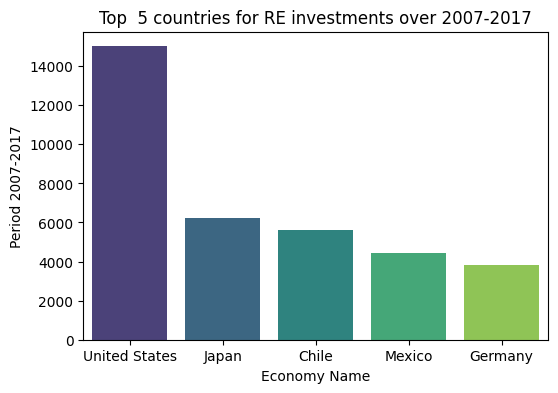

In [592]:
# Tracer le graphique en barres :
plt.figure(figsize=(6, 4))
sns.barplot(x='Economy Name', y='Period 2007-2017', data=budgets_renewables.sort_values(by= 'Period 2007-2017', ascending= False).head(5), palette='viridis')

plt.title('Top  5 countries for RE investments over 2007-2017')
plt.ylabel('Period 2007-2017')

plt.show()

### Top pays en GDP (2007-2017)

In [594]:
years_period = [str(year) for year in range(2007, 2018)]

#Create a new column 'Period 2007-2017' in order to calculate the mean of GDP for mentioned time period and round its result to 2 decimals
df_economy_gdp['Period 2007-2017'] = df_economy_gdp[years_period].mean(axis=1).round(2)
df_economy_gdp.head(3)

Economy Name    2007    2008    2009    2010    2011    2012    2013  \
279    Australia  680.15  760.81  795.30  851.17  882.36  914.48  970.76   
605      Austria  297.73  317.81  328.57  322.51  332.00  352.02  359.02   
931      Belgium  364.65  375.99  389.52  382.75  394.35  413.28  420.31   

       2014     2015     2016     2017  Period 2007-2017  
279  999.60  1095.38  1138.08  1187.32            934.13  
605  361.40   395.49   404.29   417.23            353.46  
931  422.81   481.47   494.12   509.53            422.62

In [595]:
#Display the values of mean of GDP by descending order and filter top 5 GDP countries
df_economy_gdp.sort_values(by= 'Period 2007-2017', ascending= False).head(5)

Economy Name      2007      2008      2009      2010      2011  \
10711   United States  13020.86  13843.82  14264.60  14256.28  14657.80   
6473            Japan   4170.53   4289.81   4354.37   4159.43   4309.53   
2887          Germany   2558.91   2809.69   2910.49   2806.27   2940.43   
1257           Brazil   1701.18   1835.64   1981.21   2013.19   2172.06   
4843   United Kingdom   2121.77   2137.42   2230.55   2139.40   2172.77   

           2012      2013      2014      2015      2016      2017  \
10711  15094.03  15684.75  16799.70  17418.92  17947.00  18569.10   
6473    4440.38   4627.89   4698.80   4750.77   4830.06   5237.79   
2887    3099.08   3197.07   3232.54   3721.55   3840.55   3980.28   
1257    2294.24   2355.59   2423.31   3263.83   3192.40   3141.33   
4843    2260.80   2336.30   2390.87   2548.89   2679.32   2785.56   

       Period 2007-2017  
10711          15596.08  
6473            4533.58  
2887            3190.62  
1257            2397.63  
4843            2345.79

/var/folders/f0/kz3pcppd42x67vkzrt_f2f4w0000gn/T/ipykernel_11301/1428559100.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Economy Name', y='Period 2007-2017', data=df_economy_gdp.sort_values(by= 'Period 2007-2017', ascending= False).head(5), palette='viridis')


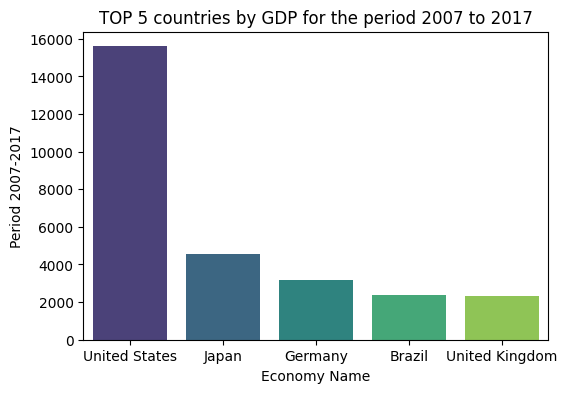

In [596]:
# Tracer le graphique en barres :
plt.figure(figsize=(6, 4))
sns.barplot(x='Economy Name', y='Period 2007-2017', data=df_economy_gdp.sort_values(by= 'Period 2007-2017', ascending= False).head(5), palette='viridis')

plt.title('TOP 5 countries by GDP for the period 2007 to 2017')
plt.ylabel('Period 2007-2017')

plt.show()

### Top pays en GCI (2007-2017)

In [599]:
years_period = [str(year) for year in range(2007, 2018)]

#Create a new column 'Period 2007-2017' in order to calculate the mean of GCI for mentioned time period and round its result to 2 decimals
df_gci_mean_country['Period 2007-2017'] = df_gci_mean_country[years_period].mean(axis=1).round(2)
df_gci_mean_country.head(3)

Economy Name      2007      2008      2009      2010      2011      2012  \
0    Australia  5.317500  5.345000  5.290000  5.272500  5.265833  5.274167   
1      Austria  5.297500  5.314167  5.225000  5.181667  5.207500  5.262500   
2      Belgium  5.153333  5.215000  5.155833  5.142500  5.268333  5.252500   

       2013      2014      2015      2016      2017  Period 2007-2017  
0  5.243333  5.236667  5.303333  5.342500  5.326667              5.29  
1  5.216667  5.236667  5.177500  5.281667  5.300833              5.25  
2  5.194167  5.235000  5.255833  5.305000  5.265833              5.22

In [606]:
df_gci_mean_country.sort_values(by= 'Period 2007-2017', ascending= False).head(5)

Economy Name      2007      2008      2009      2010      2011      2012  \
29    Switzerland  5.655000  5.668333  5.636667  5.678333  5.790000  5.780000   
28         Sweden  5.585833  5.597500  5.565000  5.597500  5.648333  5.588333   
32  United States  5.638333  5.704167  5.525000  5.388333  5.395000  5.427500   
9         Finland  5.559167  5.582500  5.507500  5.438333  5.529167  5.600000   
21    Netherlands  5.493333  5.490833  5.395000  5.420000  5.490000  5.563333   

        2013      2014      2015      2016      2017  Period 2007-2017  
29  5.722500  5.761667  5.822500  5.871667  5.927500              5.76  
28  5.548333  5.471667  5.495000  5.599167  5.575833              5.57  
32  5.440833  5.490833  5.570833  5.670000  5.818333              5.55  
9   5.583333  5.555833  5.511667  5.496667  5.556667              5.54  
21  5.494167  5.525000  5.583333  5.649167  5.745000              5.53

/var/folders/f0/kz3pcppd42x67vkzrt_f2f4w0000gn/T/ipykernel_11301/374546352.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Economy Name', y='Period 2007-2017', data=df_gci_mean_country.sort_values(by= 'Period 2007-2017', ascending= False).head(5), palette='viridis')


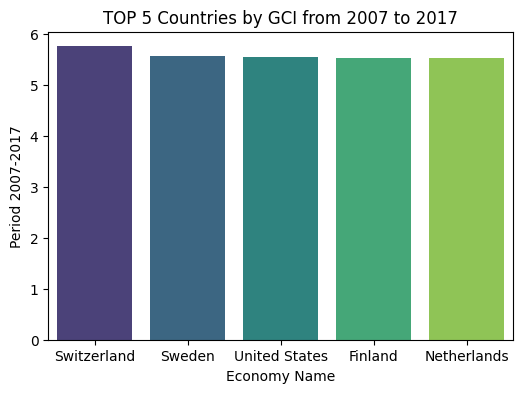

In [609]:
# Tracer le graphique en barres :
plt.figure(figsize=(6, 4))
sns.barplot(x='Economy Name', y='Period 2007-2017', data=df_gci_mean_country.sort_values(by= 'Period 2007-2017', ascending= False).head(5), palette='viridis')

plt.title('TOP 5 Countries by GCI from 2007 to 2017')
plt.ylabel('Period 2007-2017')

plt.show()

## Corrélation GDP x GCI par pays de 2007 à 2017
(Global Competitiveness Index = moyenne 12 pilliers)

Répond à la question : est-ce qu'un pays avec un bon PBI est un pays ayant un bon score de compétitivité globale sur les 12 pilliers ?

##### Scatter plot des corrélations GDP x GCI 
Permet de visualiser directement la relation entre le GDP et le score pour chaque pays. La ligne de régression permet de voir la tendance générale.

In [466]:
df_economy_gdp.head(3)

Economy Name    2007    2008    2009    2010    2011    2012    2013  \
279    Australia  680.15  760.81  795.30  851.17  882.36  914.48  970.76   
605      Austria  297.73  317.81  328.57  322.51  332.00  352.02  359.02   
931      Belgium  364.65  375.99  389.52  382.75  394.35  413.28  420.31   

       2014     2015     2016     2017  
279  999.60  1095.38  1138.08  1187.32  
605  361.40   395.49   404.29   417.23  
931  422.81   481.47   494.12   509.53

In [465]:
df_gci_mean_country.head(3)

Economy Name      2007      2008      2009      2010      2011      2012  \
0    Australia  5.317500  5.345000  5.290000  5.272500  5.265833  5.274167   
1      Austria  5.297500  5.314167  5.225000  5.181667  5.207500  5.262500   
2      Belgium  5.153333  5.215000  5.155833  5.142500  5.268333  5.252500   

       2013      2014      2015      2016      2017  
0  5.243333  5.236667  5.303333  5.342500  5.326667  
1  5.216667  5.236667  5.177500  5.281667  5.300833  
2  5.194167  5.235000  5.255833  5.305000  5.265833

In [452]:
# Initialiser une liste pour stocker les résultats de corrélation
correlation_results = []

# Calculer la corrélation pour chaque pays
for country in df_economy_gdp['Economy Name']:
    gdp_data = df_economy_gdp[df_economy_gdp['Economy Name'] == country].iloc[:, 1:].values.flatten()
    score_data = df_gci_mean_country[df_gci_mean_country['Economy Name'] == country].iloc[:, 1:].values.flatten()
    correlation = np.corrcoef(gdp_data, score_data)[0, 1]
    correlation_results.append({'Country': country, 'Correlation': correlation})

# Convertir la liste en DataFrame
correlation_results_df = pd.DataFrame(correlation_results)

# Afficher les résultats de la corrélation
print(correlation_results_df)

            Country  Correlation
0         Australia     0.056536
1           Austria     0.011170
2           Belgium     0.729087
3            Brazil    -0.284664
4            Canada    -0.206305
5       Switzerland     0.893247
6             Chile     0.506331
7           Czechia     0.762832
8           Germany     0.808789
9           Denmark    -0.166429
10            Spain     0.217259
11          Estonia     0.946156
12          Finland    -0.007072
13           France    -0.127028
14   United Kingdom     0.634991
15           Greece     0.162202
16          Hungary    -0.270933
17          Ireland     0.817011
18            Italy     0.681750
19            Japan     0.869815
20      Korea, Rep.    -0.431844
21        Lithuania     0.897464
22       Luxembourg     0.786545
23           Mexico     0.779892
24      Netherlands     0.829865
25           Norway     0.839754
26      New Zealand     0.962371
27           Poland     0.885448
28         Portugal     0.518035
29  Slovak

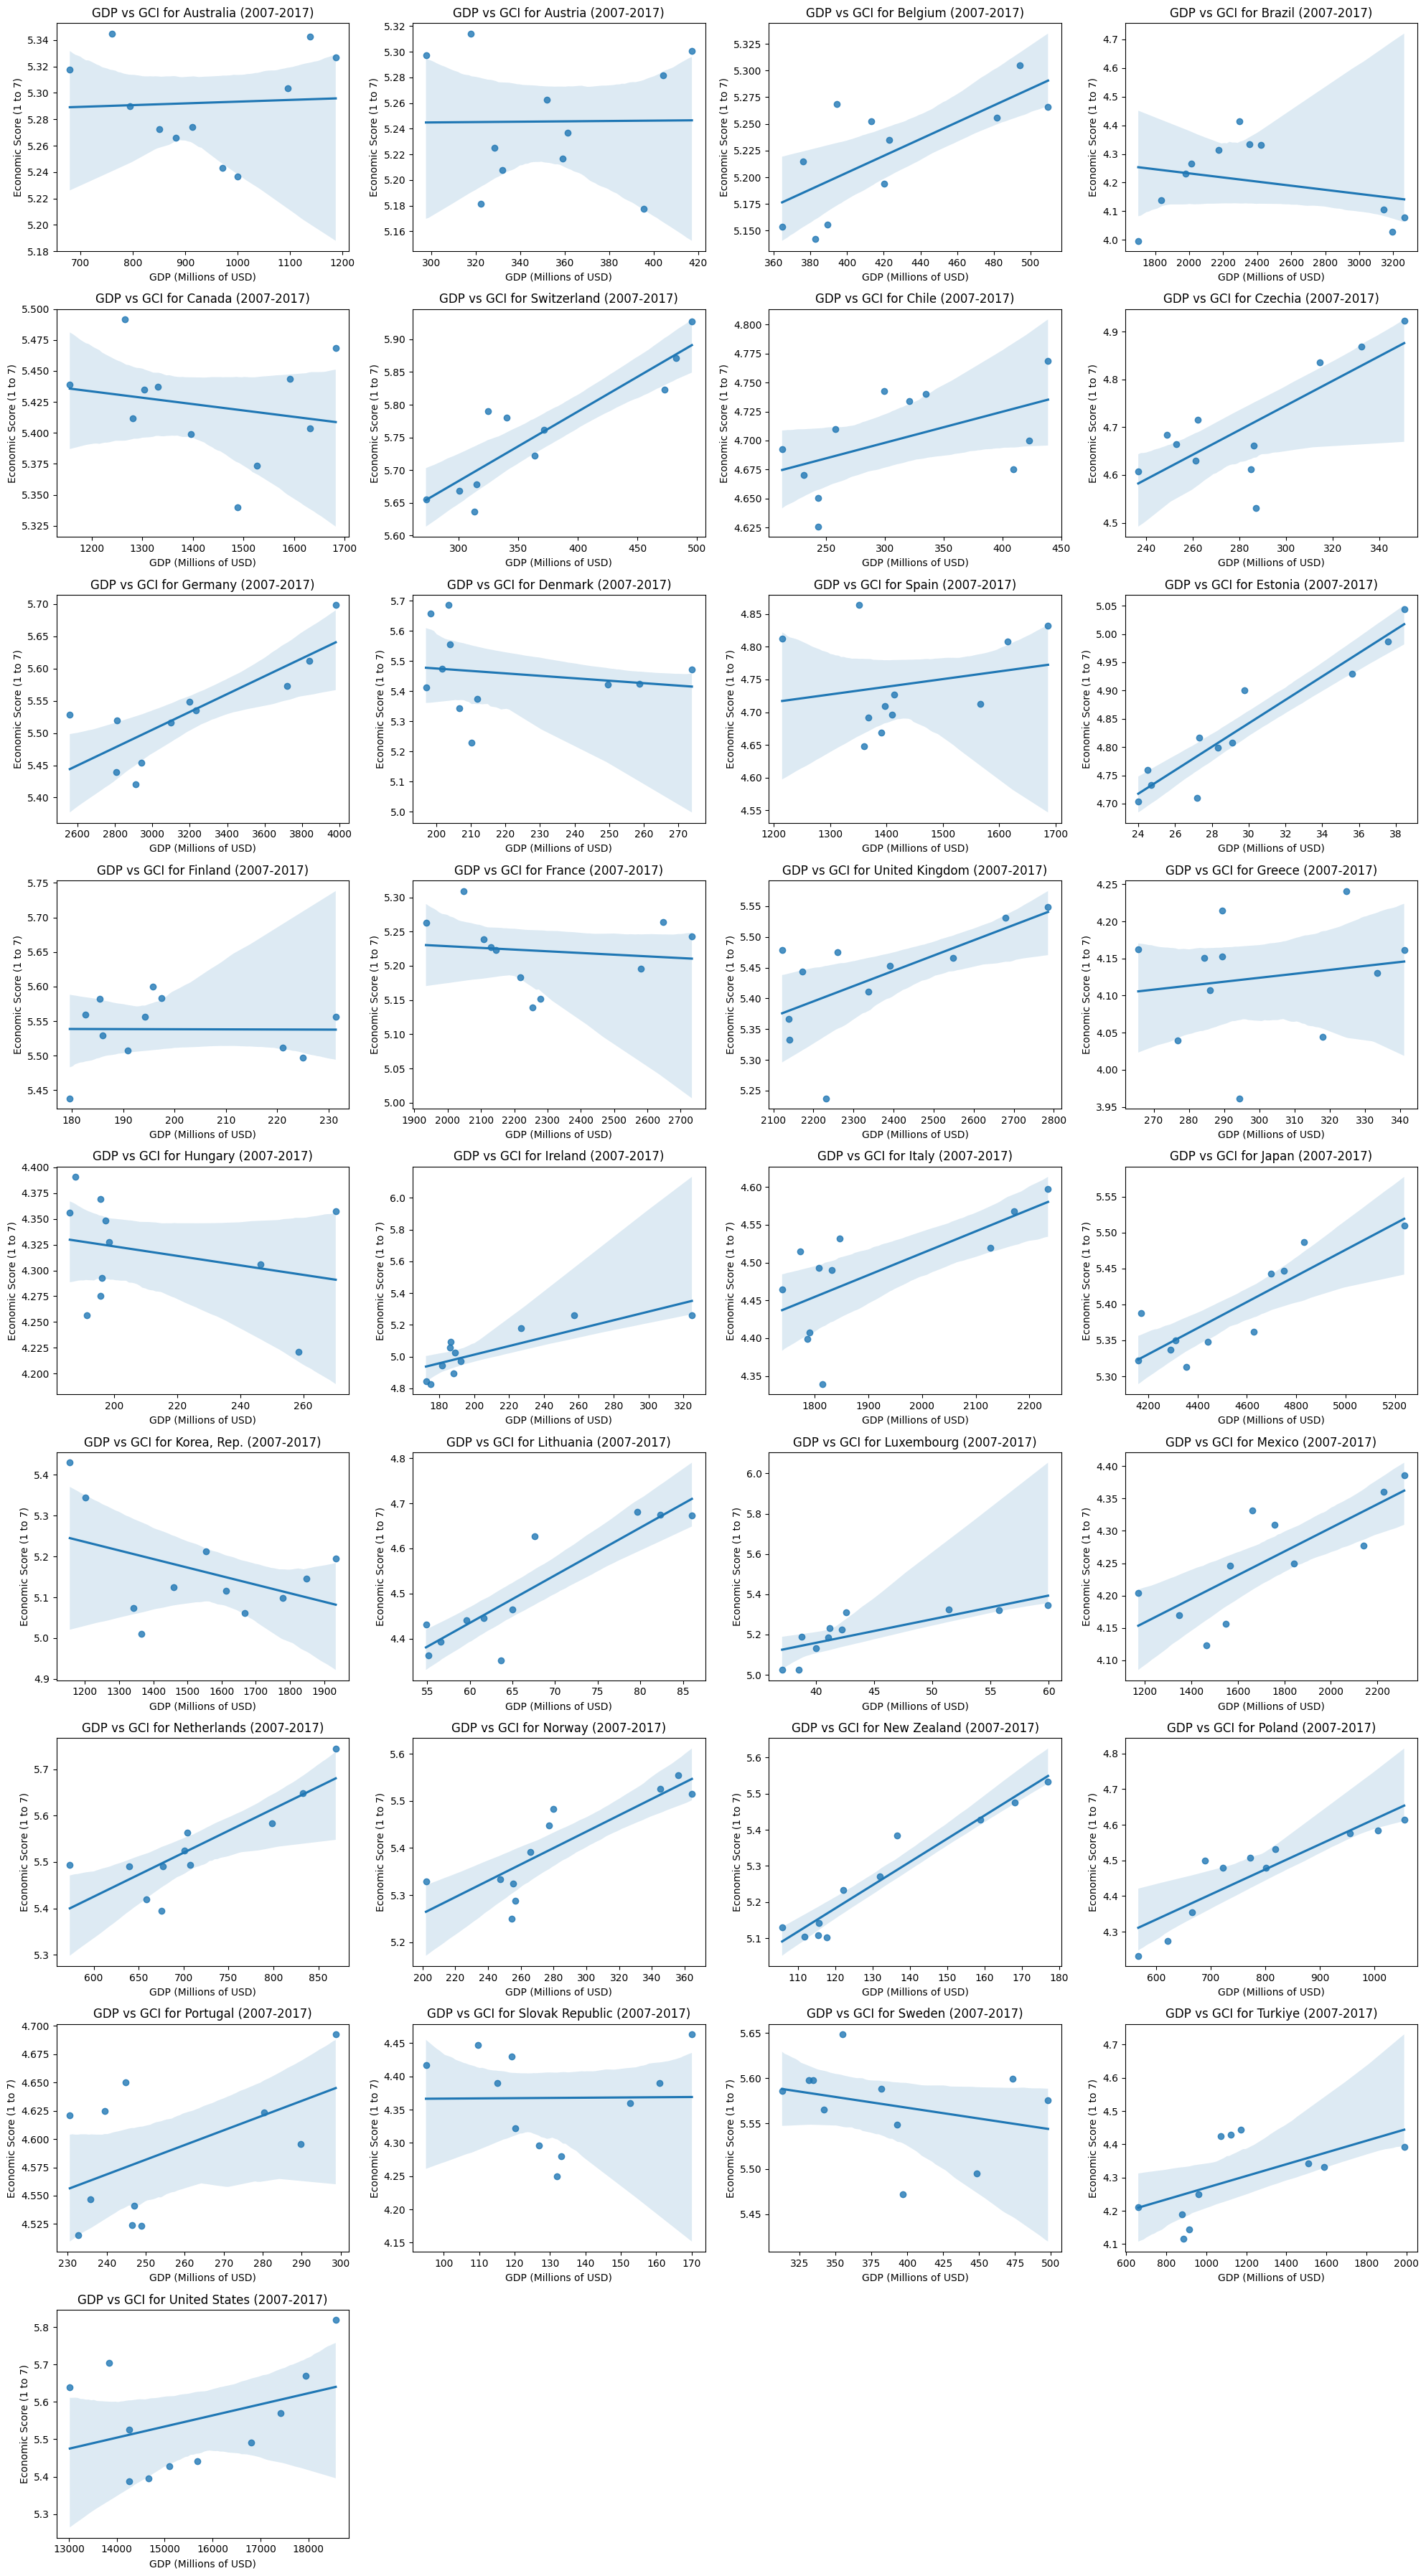

In [470]:
# Visualiser les scatter plots avec ligne de régression pour chaque pays
# Scatter plots avec ligne de régression : Ces graphiques permettent de visualiser directement la relation entre le GDP et le score pour chaque pays. 
# Une ligne de régression permet de voir la tendance générale.
# Liste des pays à visualiser
countries = df_economy_gdp['Economy Name'].unique()

# Définir la taille de la grille
n_countries = len(countries)
n_cols = 4  # Nombre de colonnes de la grille
n_rows = (n_countries + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaire

# Créer une figure et des axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 4))

# Boucle pour chaque pays et tracer les scatter plots
for i, country in enumerate(countries):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    gdp_data = df_economy_gdp[df_economy_gdp['Economy Name'] == country].iloc[:, 1:].values.flatten()
    score_data = df_gci_mean_country[df_gci_mean_country['Economy Name'] == country].iloc[:, 1:].values.flatten()
    
    sns.regplot(x=gdp_data, y=score_data, ax=ax)
    ax.set_title(f'GDP vs GCI for {country} (2007-2017)')
    ax.set_xlabel('GDP (Millions of USD)')
    ax.set_ylabel('Economic Score (1 to 7)')

# Supprimer les axes inutilisés
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


****Interprétation des résultats :****

****Points de données :****
Chaque point sur le graphique représente une année entre 2007 et 2017.
Les points montrent la combinaison de GDP et de score économique pour chaque année.

****La ligne de régression linéaire :**** tente de modéliser la relation entre le GDP et le score économique
La pente de cette ligne indique la tendance générale
    Si pente fortement positive/négative <-> forte corrélation positive/négative entre GDP et GCI <-> lorsque GDP augmente, GCI a tendance à augmenter/diminuer fortement
    Si pente faiblement positive/négative <-> faible corrélation positive/négative entre GDP et GCI <-> lorsque GDP augmente, GCI a tendance à augmenter/diminuer faiblement
    
****L'intervalle de confiance :**** Zone bleue -> montre l'incertitude de la ligne de régression. Plus la bande est large, plus l'incertitude est grande.
    La large bande de l'intervalle de confiance indique une incertitude importante autour de la relation entre le GDP et le score économique.
    Cela signifie que la corrélation observée n'est pas très robuste et peut être sujette à des variations.

****Dispersion des données :****
    Les points sont assez dispersés autour de la ligne de régression <-> beaucoup de variabilité dans les données <-> Cela signifie que d'autres facteurs, en plus du GDP, influencent le score économique


Si ligne de régression linéaire a une faible pente
+ forte dispersion des données autour de cette ligne
+ intervalle de confiance faible (zone bleue importante)
=
Interprétation prudente : La relation entre le GDP et le score économique n'est pas suffisamment forte pour tirer des conclusions définitives

##### Heatmap des corrélations GDP x GCI 
Permet de voir rapidement quelles paires de pays ont des corrélations fortes (positives ou négatives) entre leur GDP et leur score économique.

In [463]:
# Initialiser un DataFrame pour stocker les corrélations annuelles
correlation_matrix = pd.DataFrame(index=df_economy_gdp['Economy Name'].unique(), columns=['Correlation'])

# Ajouter les corrélations calculées au DataFrame
for result in correlation_results:
    correlation_matrix.loc[result['Country']] = result['Correlation']

# Convertir les valeurs en flottants
correlation_matrix = correlation_matrix.astype(float)

# Afficher les résultats de la corrélation
print(correlation_matrix)


                 Correlation
Australia           0.056536
Austria             0.011170
Belgium             0.729087
Brazil             -0.284664
Canada             -0.206305
Switzerland         0.893247
Chile               0.506331
Czechia             0.762832
Germany             0.808789
Denmark            -0.166429
Spain               0.217259
Estonia             0.946156
Finland            -0.007072
France             -0.127028
United Kingdom      0.634991
Greece              0.162202
Hungary            -0.270933
Ireland             0.817011
Italy               0.681750
Japan               0.869815
Korea, Rep.        -0.431844
Lithuania           0.897464
Luxembourg          0.786545
Mexico              0.779892
Netherlands         0.829865
Norway              0.839754
New Zealand         0.962371
Poland              0.885448
Portugal            0.518035
Slovak Republic     0.010961
Sweden             -0.294169
Turkiye             0.568415
United States       0.384977


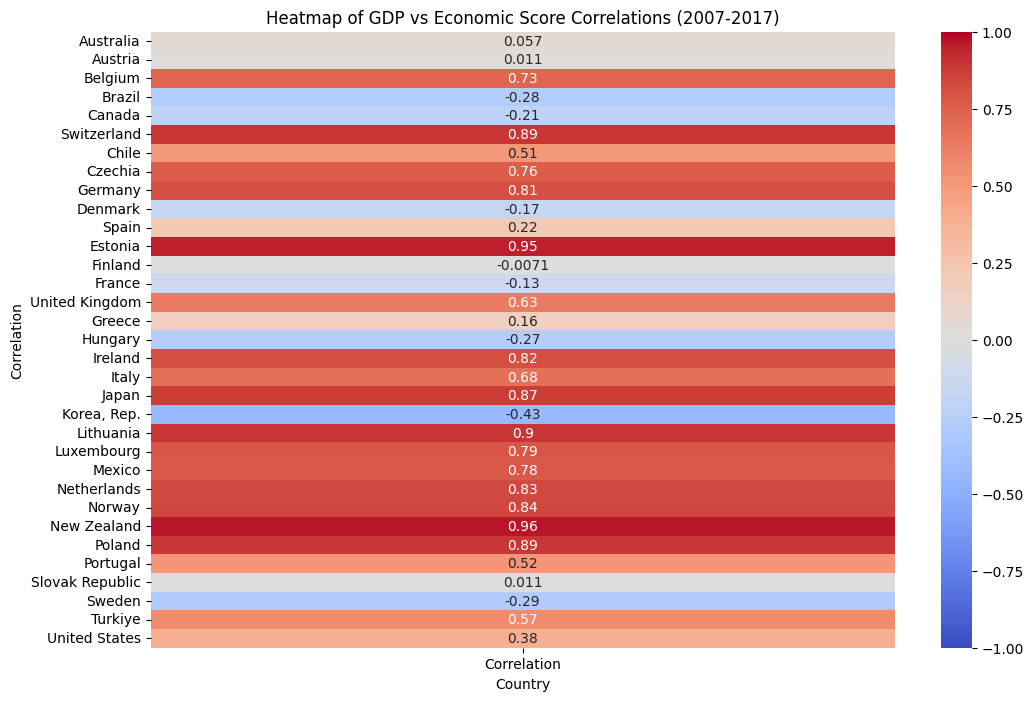

In [464]:
# Générer la heatmap de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Heatmap of GDP vs Economic Score Correlations (2007-2017)')
plt.xlabel('Country')
plt.ylabel('Correlation')
plt.show()


****Interprétation des résultats :****

****Corrélation positive modérée à forte (orange / rouge) :****
    Ces pays montrent une forte corrélation positive entre le GDP et le score économique. Cela signifie qu'une augmentation du GDP est fortement associée à une augmentation du score économique

****Corrélations proches de zéro :**** indiquent peu ou pas de relation entre le GDP et le score économique. Cela pourrait suggérer que le score économique de ces pays est influencé par des facteurs autres que le GDP.

Si nous avions eu des corrélations négatives fortes <-> corrélation négative forte entre le GDP et le score économique. Cela signifie qu'une augmentation du GDP est associée à une diminution importante du score économique, ce qui pourrait indiquer des problèmes structurels ou d'autres facteurs influençant négativement le score économique malgré une augmentation du GDP.

## Corrélation entre le GCI x ER (part d'investissement en énergie renouvelable) pour tous les pays

Répond à la question : Existe-t-il une corrélation entre la compétitivité d'un pays et l'inv en ER ? 

In [507]:
df_gci_mean_country.head(3)

Economy Name      2007      2008      2009      2010      2011      2012  \
0    Australia  5.317500  5.345000  5.290000  5.272500  5.265833  5.274167   
1      Austria  5.297500  5.314167  5.225000  5.181667  5.207500  5.262500   
2      Belgium  5.153333  5.215000  5.155833  5.142500  5.268333  5.252500   

       2013      2014      2015      2016      2017  
0  5.243333  5.236667  5.303333  5.342500  5.326667  
1  5.216667  5.236667  5.177500  5.281667  5.300833  
2  5.194167  5.235000  5.255833  5.305000  5.265833

In [565]:
budgets_renewables.head(3) 
# Attention, revoir le interpolate dans le code Dépenses en énergie car les ordres de grandeur ne sont pas OK


Economy Name    2007       2008       2009    2010     2011     2012  \
29     Australia  50.553  43.747000  84.191000  89.589  173.803  226.167   
74       Austria  28.002  45.348000  59.308000  60.608   58.045   48.935   
119      Belgium  27.484  18.322667   9.161333   0.000   29.660   29.787   

        2013    2014     2015    2016    2017  
29   448.283  81.671  131.836  48.560  57.124  
74    50.330  54.151   36.128  48.910  33.920  
119   32.115  44.781   28.922  24.496  25.865

##### Scatter plot des corrélations GCI x ER

In [578]:
# Fusionner les deux dataframes
merged_gci_er_df = pd.merge(df_gci_mean_country, budgets_renewables, on="Economy Name", suffixes=('_GCI', '_ERInvestments'))

# Liste des pays à visualiser
countries = merged_gci_er_df['Economy Name'].unique()

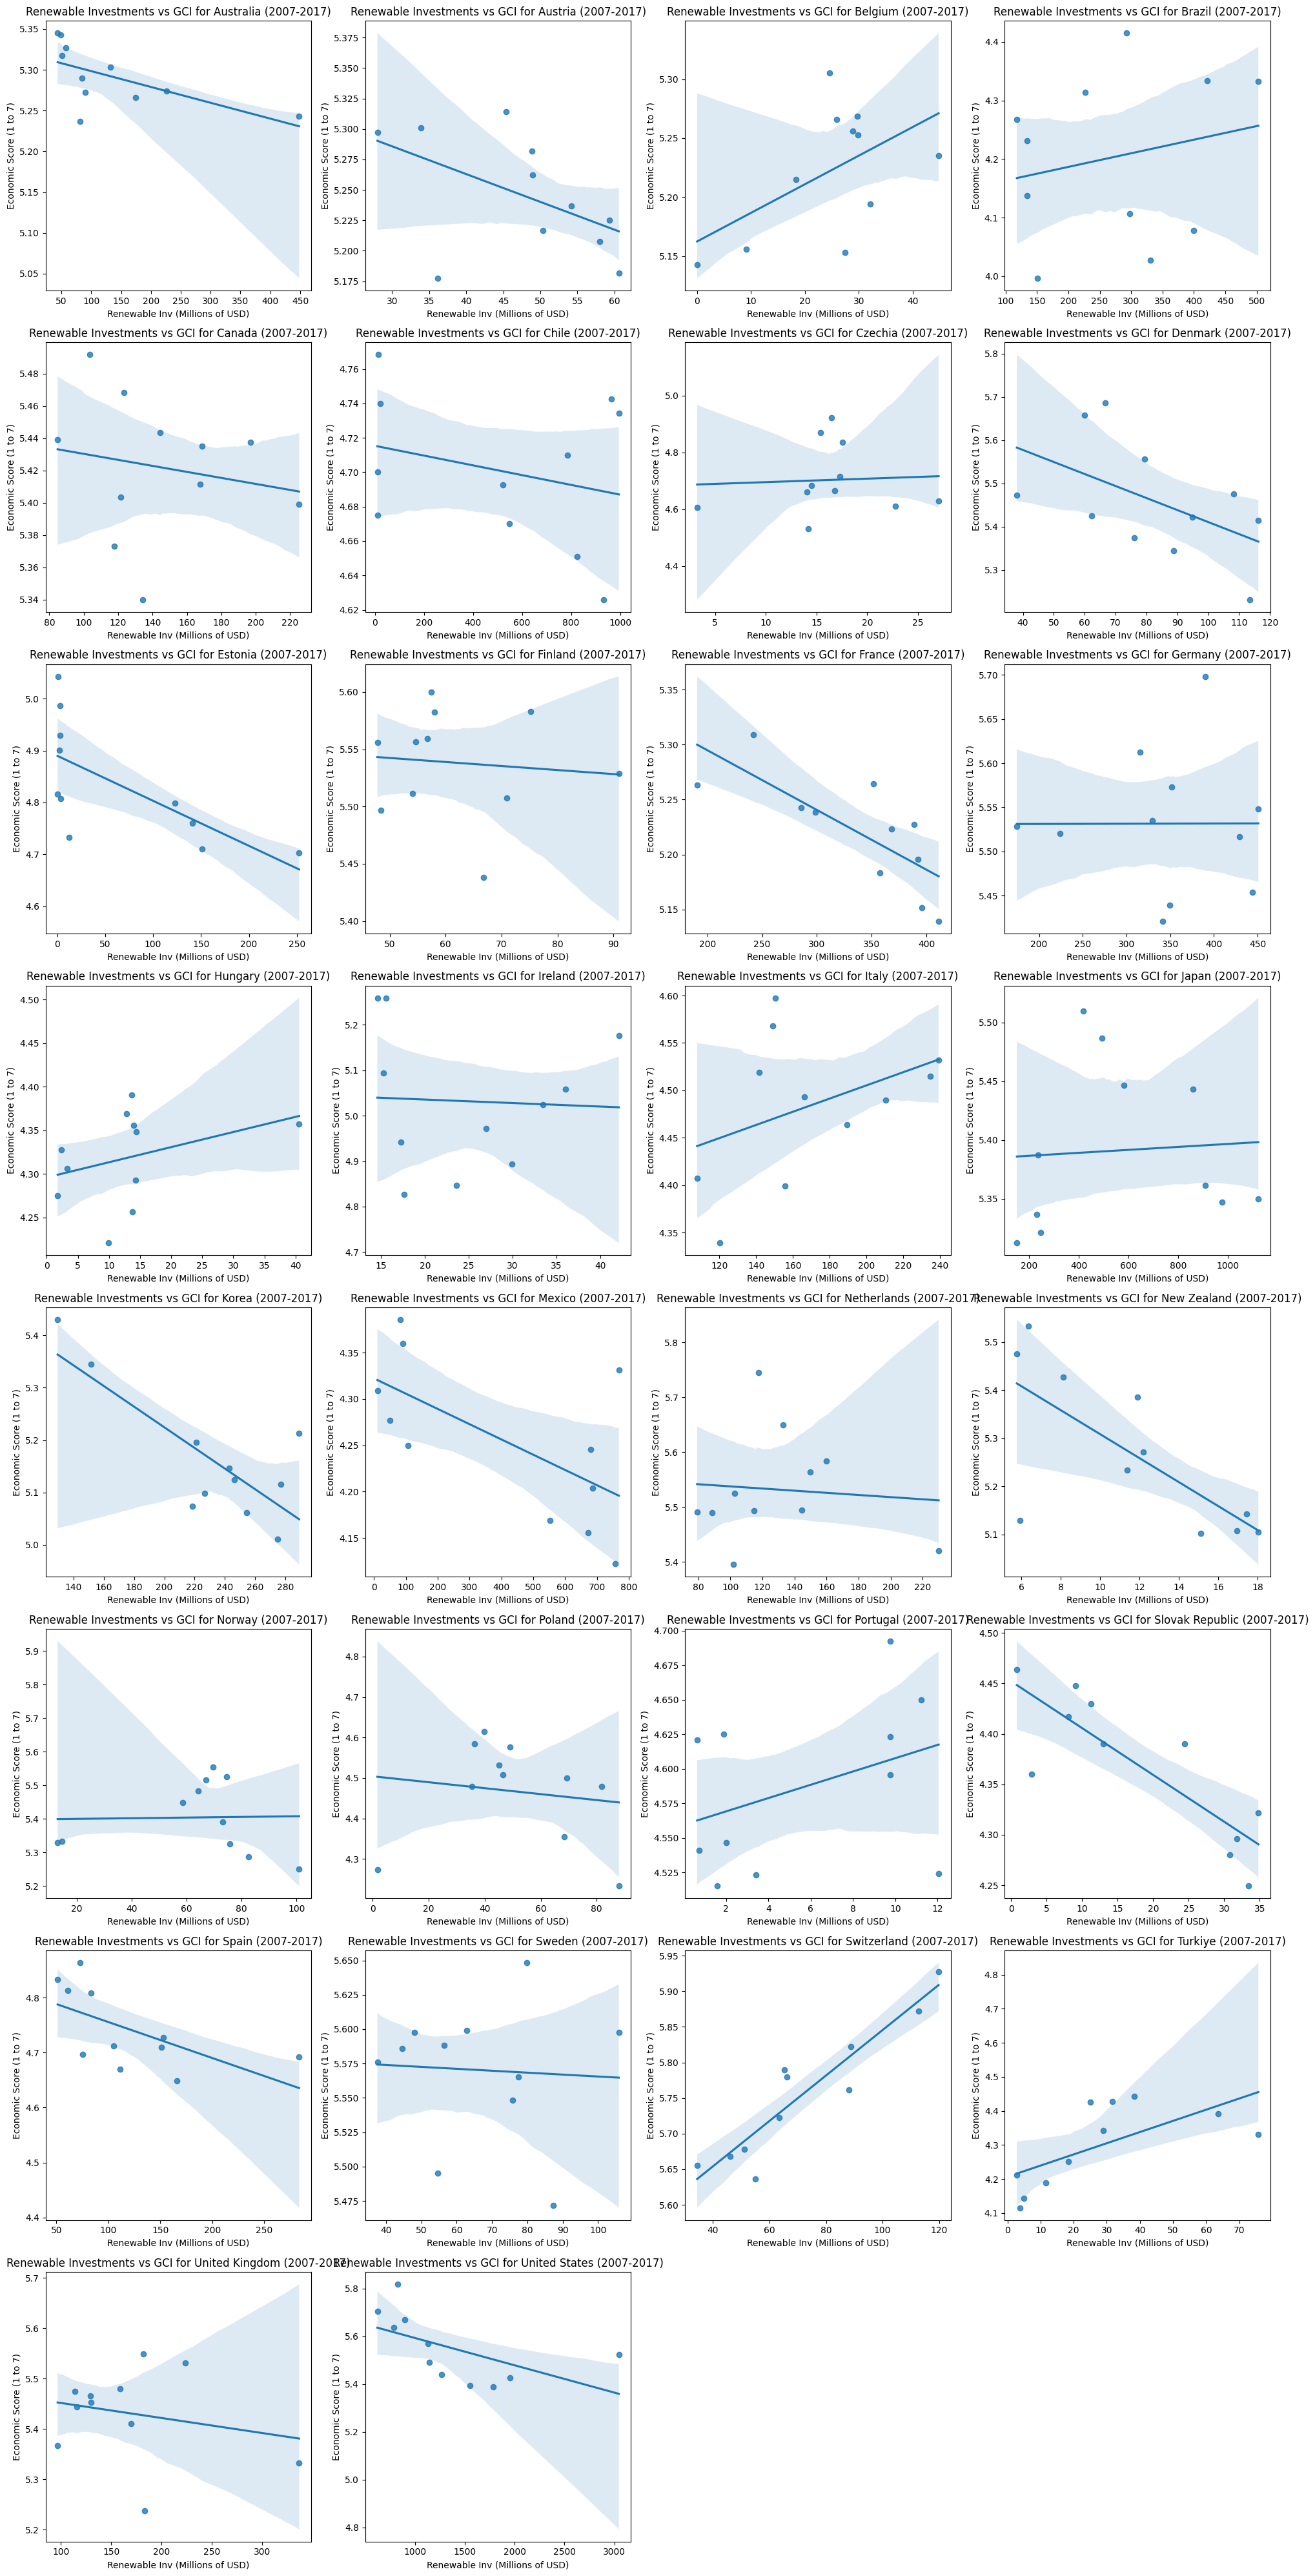

In [579]:
# Définir la taille de la grille
n_countries = len(countries)
n_cols = 4  # Nombre de colonnes de la grille
n_rows = (n_countries + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaire

# Créer une figure et des axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Boucle pour chaque pays et tracer les scatter plots
for i, country in enumerate(countries):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    gci_data = merged_gci_er_df.loc[merged_gci_er_df['Economy Name'] == country, '2007_GCI':'2017_GCI'].values.flatten()
    er_data = merged_gci_er_df.loc[merged_gci_er_df['Economy Name'] == country, '2007_ERInvestments':'2017_ERInvestments'].values.flatten()
    
    sns.regplot(x=er_data, y=gci_data, ax=ax)
    ax.set_title(f'Renewable Investments vs GCI for {country} (2007-2017)')
    ax.set_xlabel('Renewable Inv (Millions of USD)')
    ax.set_ylabel('Economic Score (1 to 7)')

# Supprimer les axes inutilisés
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()

##### Heatmap des corrélations GCI x ER #####

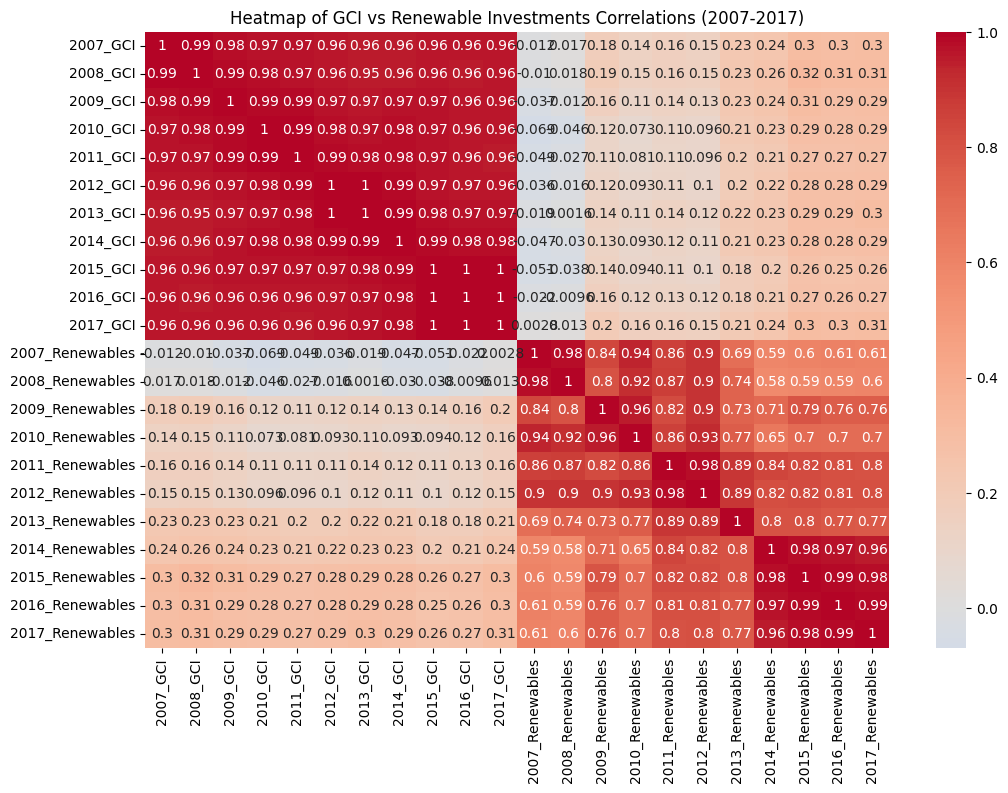

In [585]:
# TEST 1

# Fusionner les dataframes pour calculer les corrélations
merged_gci_er_df2 = pd.merge(df_gci_mean_country, budgets_renewables, on='Economy Name', suffixes=('_GCI', '_Renewables'))

# Calculer les corrélations seulement pour les colonnes de GCI et Renewables
gci_cols = [col for col in merged_gci_er_df2.columns if '_GCI' in col]
renewables_cols = [col for col in merged_gci_er_df2.columns if '_Renewables' in col]

# Créer un dataframe pour les corrélations
corr_data_gci_er = merged_gci_er_df2[gci_cols + renewables_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_data_gci_er, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of GCI vs Renewable Investments Correlations (2007-2017)')
plt.show()

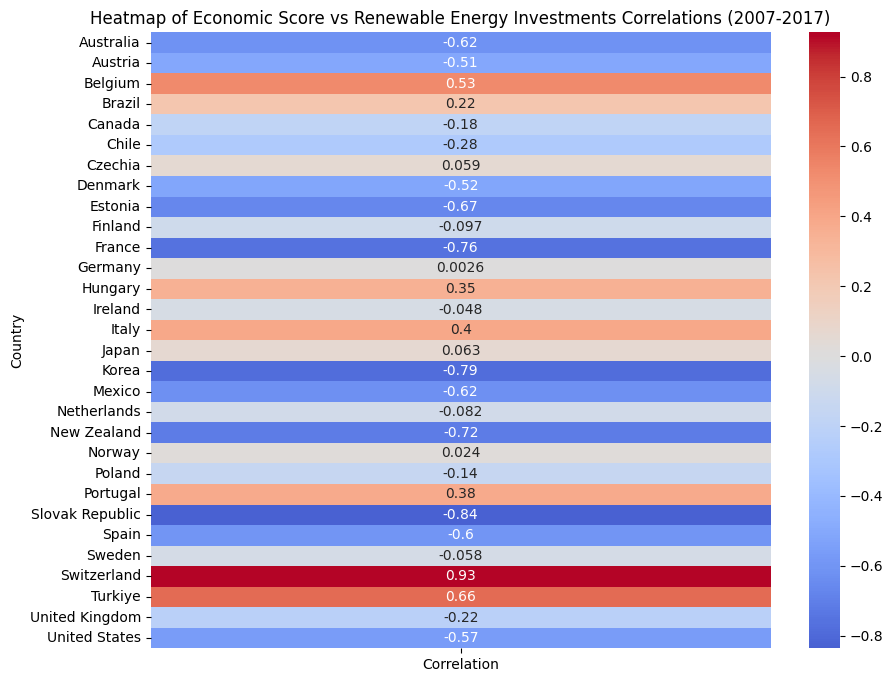

In [581]:
# TEST 2 

# Calculer les corrélations
correlation_gci_er = []

for country in merged_gci_er_df['Economy Name'].unique():
    gci_data = merged_gci_er_df.loc[merged_gci_er_df['Economy Name'] == country, '2007_GCI':'2017_GCI'].values.flatten()
    er_data = merged_gci_er_df.loc[merged_gci_er_df['Economy Name'] == country, '2007_ERInvestments':'2017_ERInvestments'].values.flatten()
    correcoef_gci_er = np.corrcoef(gci_data, er_data)[0, 1]
    correlation_gci_er.append({'Country': country, 'Correlation': correcoef_gci_er})

# Convertir la liste en DataFrame
correlation_gci_er_df = pd.DataFrame(correlation_gci_er).set_index('Country')

# Heatmap des corrélations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_gci_er_df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Economic Score vs Renewable Energy Investments Correlations (2007-2017)')
plt.show()

****Interprétation des résultats :****

****Corrélation négative forte (bleu) :****
    corrélation négative entre les investissements en énergie renouvelable et le score économique (GCI) <-> l'augmentation des investissements en énergie renouvelable est associée à une diminution du score économique.

****Corrélation proche de zéro (gris) :****
    Peu ou pas de corrélation


## Corrélation entre GDP x ER

In [559]:
df_economy_gdp.head(3)

Economy Name    2007    2008    2009    2010    2011    2012    2013  \
279    Australia  680.15  760.81  795.30  851.17  882.36  914.48  970.76   
605      Austria  297.73  317.81  328.57  322.51  332.00  352.02  359.02   
931      Belgium  364.65  375.99  389.52  382.75  394.35  413.28  420.31   

       2014     2015     2016     2017  
279  999.60  1095.38  1138.08  1187.32  
605  361.40   395.49   404.29   417.23  
931  422.81   481.47   494.12   509.53

In [561]:
budgets_renewables.head(3)

Economy Name    2007       2008       2009    2010     2011     2012  \
29     Australia  50.553  43.747000  84.191000  89.589  173.803  226.167   
74       Austria  28.002  45.348000  59.308000  60.608   58.045   48.935   
119      Belgium  27.484  18.322667   9.161333   0.000   29.660   29.787   

        2013    2014     2015    2016    2017  
29   448.283  81.671  131.836  48.560  57.124  
74    50.330  54.151   36.128  48.910  33.920  
119   32.115  44.781   28.922  24.496  25.865

##### Scatter plot des corrélations GDP x ER #####

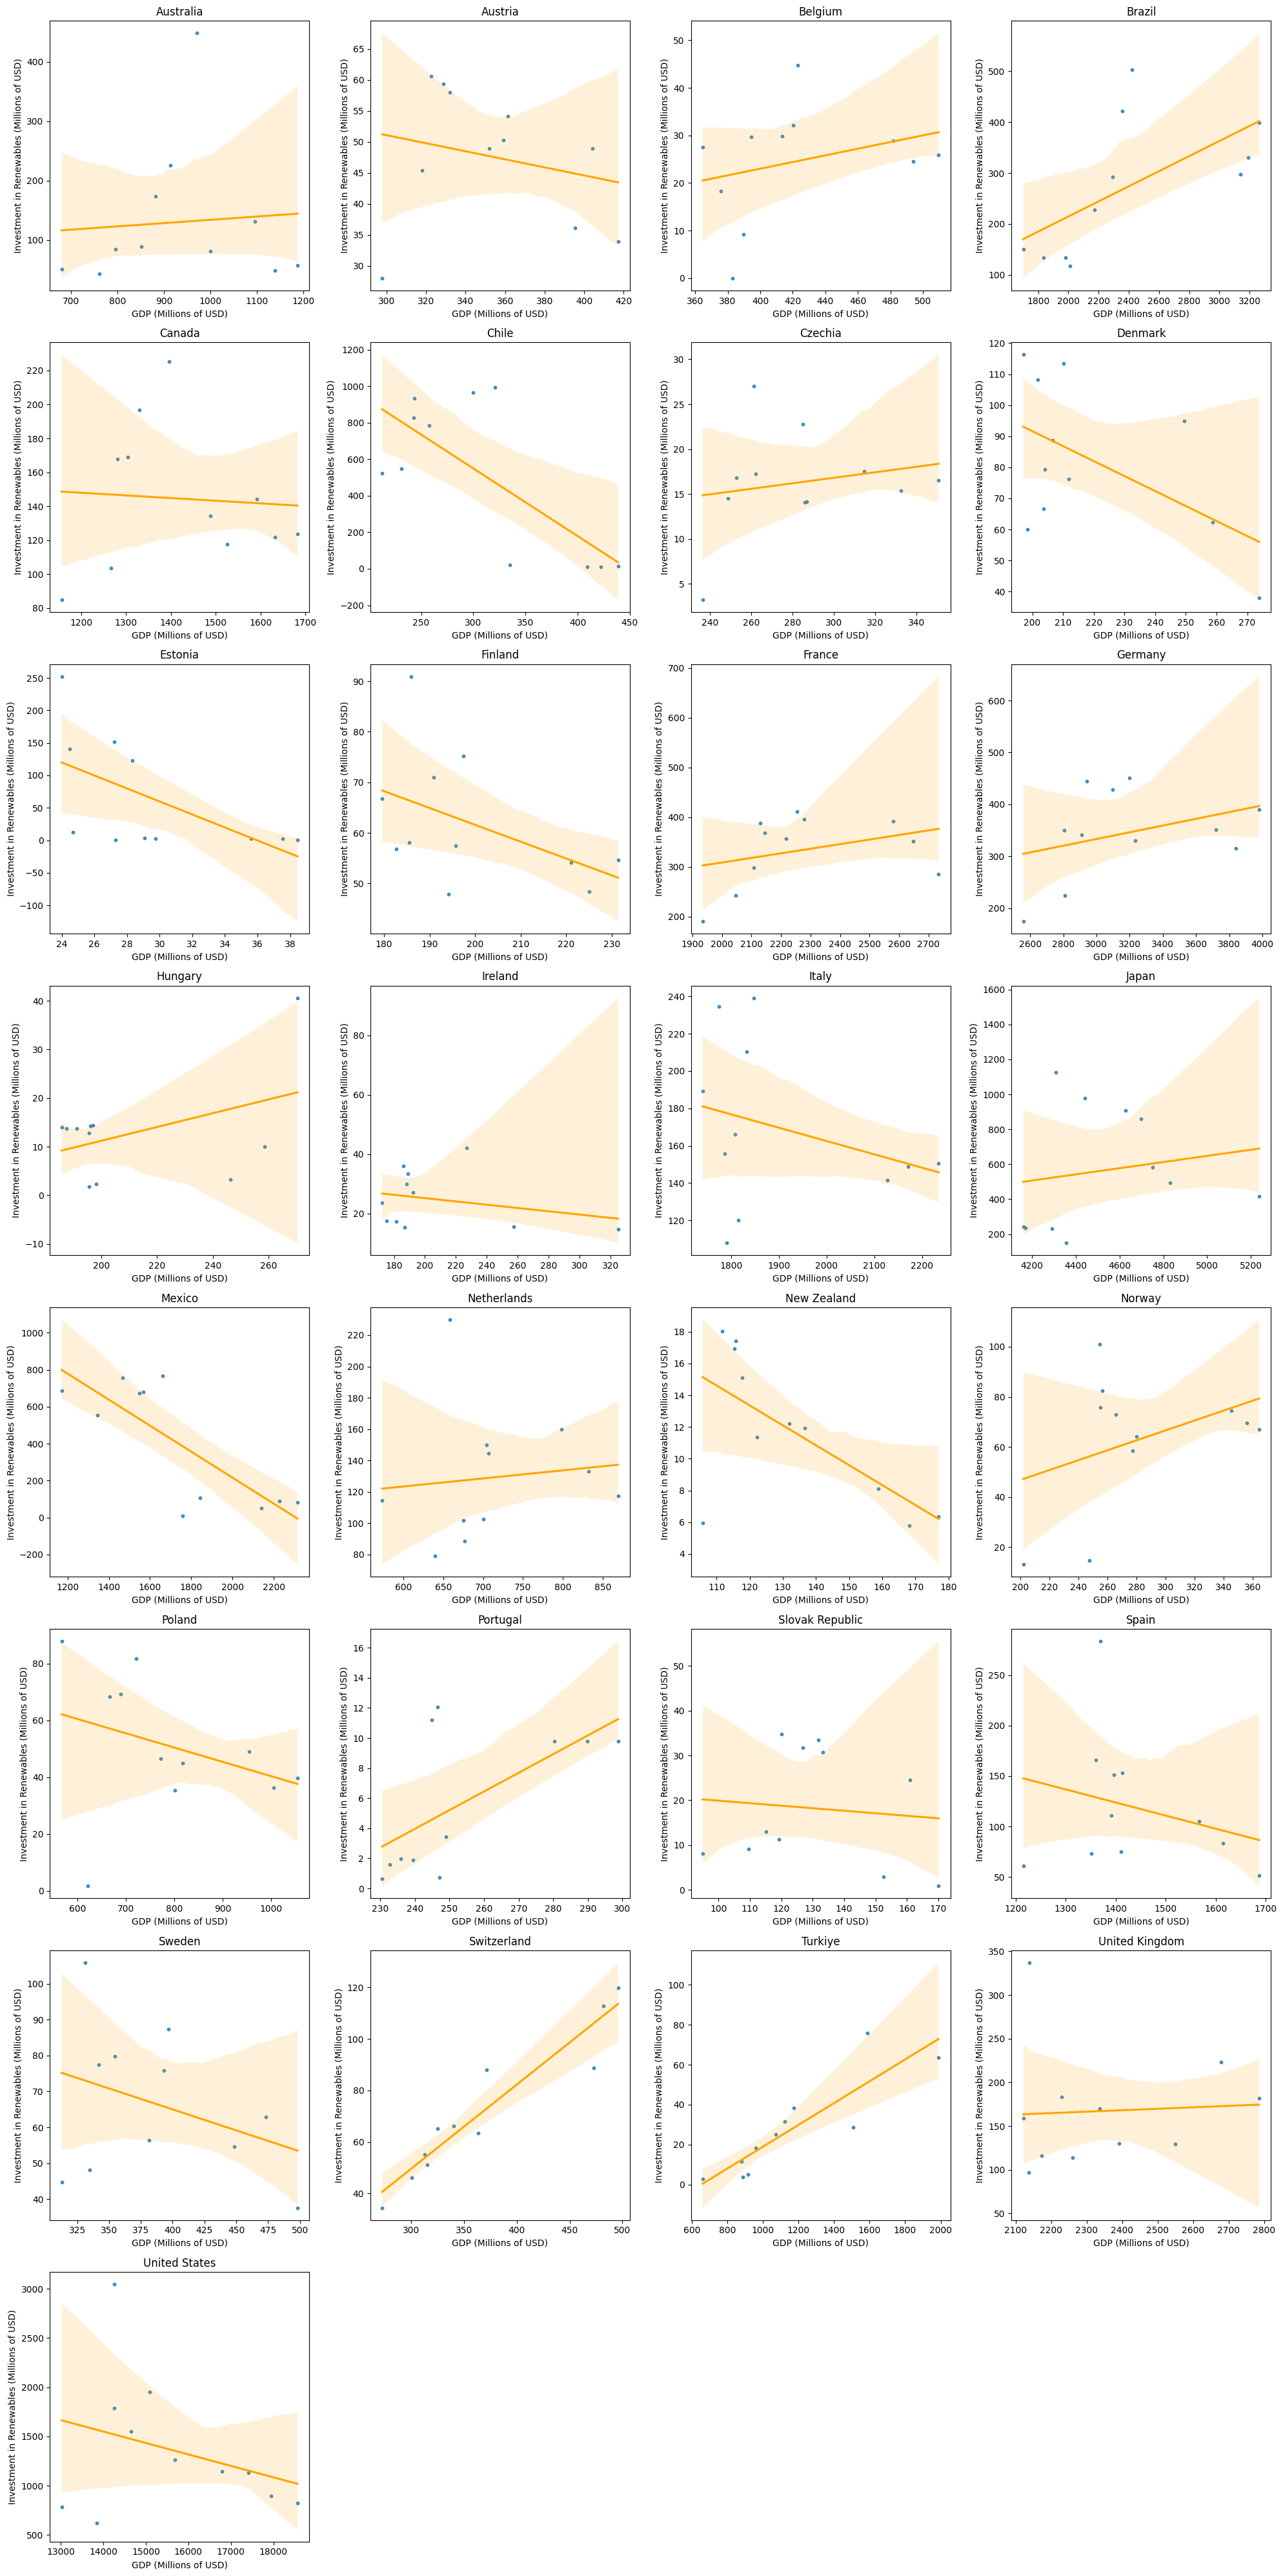

In [574]:
# Obtenir la liste des pays communs dans les deux dataframes
common_countries = sorted(set(df_economy_gdp['Economy Name']).intersection(set(budgets_renewables['Economy Name'])))

# Définir le nombre de lignes et de colonnes dynamiquement en fonction du nombre de pays
num_countries = len(common_countries)
num_cols = 4
num_rows = (num_countries + num_cols - 1) // num_cols  # Calculer le nombre de lignes nécessaires

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 5 * num_rows))

for i, country in enumerate(common_countries):
    row, col = divmod(i, num_cols)
    ax = axes[row, col] if num_rows > 1 else axes[col]
    
    # Obtenir les valeurs de GDP et d'investissement en renouvelable pour chaque pays
    gdp = df_economy_gdp[df_economy_gdp['Economy Name'] == country].iloc[:, 1:].values.flatten()
    renewables = budgets_renewables[budgets_renewables['Economy Name'] == country].iloc[:, 1:].values.flatten()
    
    # Vérifier si les deux arrays ont la même longueur
    if len(gdp) == len(renewables) and len(gdp) > 0:
        sns.regplot(x=gdp, y=renewables, ax=ax, scatter_kws={'s':10}, line_kws={'color':'orange'})
    
    ax.set_title(country)
    ax.set_xlabel('GDP (Millions of USD)')
    ax.set_ylabel('Investment in Renewables (Millions of USD)')

# Si le nombre de pays n'est pas un multiple exact de num_cols, les derniers sous-plots seront vides
for j in range(i + 1, num_rows * num_cols):
    row, col = divmod(j, num_cols)
    fig.delaxes(axes[row, col] if num_rows > 1 else axes[col])

plt.tight_layout()
plt.show()

##### Heatmap des corrélations GDP x ER #####

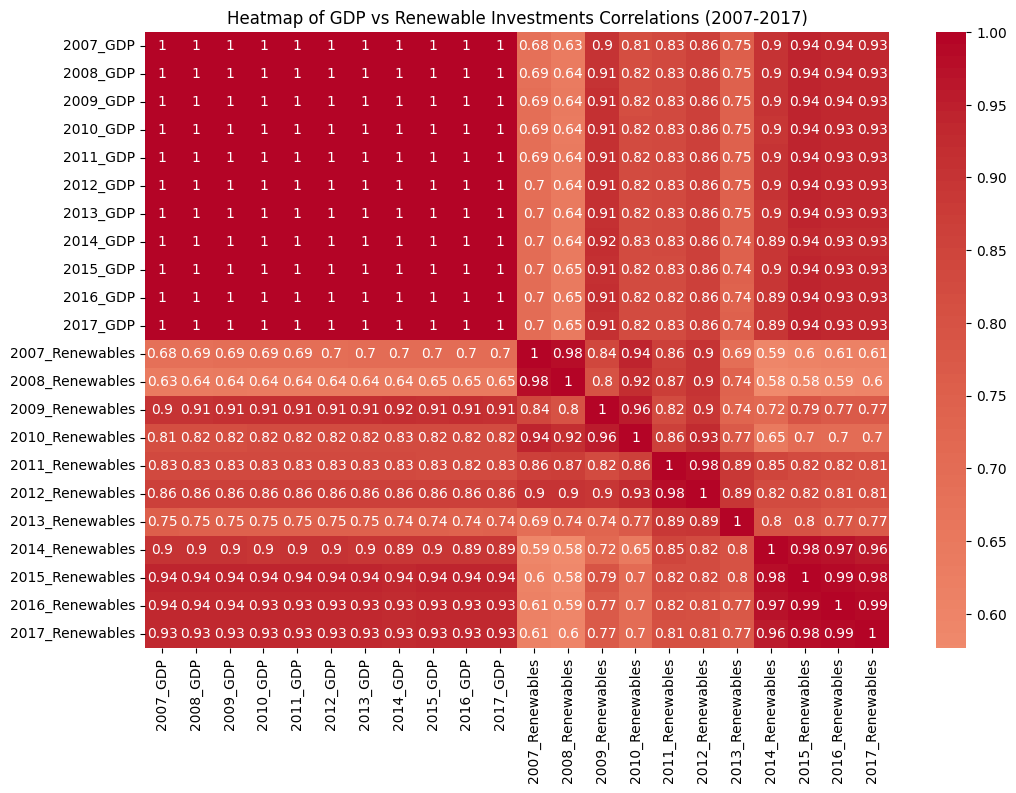

In [575]:
# Fusionner les dataframes pour calculer les corrélations
df_merged_gdp_er = pd.merge(df_economy_gdp, budgets_renewables, on='Economy Name', suffixes=('_GDP', '_Renewables'))

# Calculer les corrélations seulement pour les colonnes de GDP et Renewables
gdp_cols = [col for col in df_merged_gdp_er.columns if '_GDP' in col]
renewables_cols = [col for col in df_merged_gdp_er.columns if '_Renewables' in col]

# Créer un dataframe pour les corrélations
corr_data_gdp_er = df_merged_gdp_er[gdp_cols + renewables_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_data_gdp_er, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of GDP vs Renewable Investments Correlations (2007-2017)')
plt.show()

## Corrélation entre GDP x GCI x ER

In [537]:
df_economy_gdp.head(3)

Economy Name    2007    2008    2009    2010    2011    2012    2013  \
279    Australia  680.15  760.81  795.30  851.17  882.36  914.48  970.76   
605      Austria  297.73  317.81  328.57  322.51  332.00  352.02  359.02   
931      Belgium  364.65  375.99  389.52  382.75  394.35  413.28  420.31   

       2014     2015     2016     2017  
279  999.60  1095.38  1138.08  1187.32  
605  361.40   395.49   404.29   417.23  
931  422.81   481.47   494.12   509.53

In [539]:
budgets_renewables.head(3)

Economy Name    2007       2008       2009    2010     2011     2012  \
29     Australia  50.553  43.747000  84.191000  89.589  173.803  226.167   
74       Austria  28.002  45.348000  59.308000  60.608   58.045   48.935   
119      Belgium  27.484  18.322667   9.161333   0.000   29.660   29.787   

        2013    2014     2015    2016    2017  
29   448.283  81.671  131.836  48.560  57.124  
74    50.330  54.151   36.128  48.910  33.920  
119   32.115  44.781   28.922  24.496  25.865

In [541]:
df_gci_mean_country.head(3)

Economy Name      2007      2008      2009      2010      2011      2012  \
0    Australia  5.317500  5.345000  5.290000  5.272500  5.265833  5.274167   
1      Austria  5.297500  5.314167  5.225000  5.181667  5.207500  5.262500   
2      Belgium  5.153333  5.215000  5.155833  5.142500  5.268333  5.252500   

       2013      2014      2015      2016      2017  
0  5.243333  5.236667  5.303333  5.342500  5.326667  
1  5.216667  5.236667  5.177500  5.281667  5.300833  
2  5.194167  5.235000  5.255833  5.305000  5.265833

##### Scatter plot des corrélations GDP x GCI x ER #####

In [549]:
# Fusionner les trois DataFrames sur la colonne 'Economy Name'
merged_2df = pd.merge(df_economy_gdp, budgets_renewables, on='Economy Name', suffixes=('_GDP', '_Renewables'))
merged_2df.head(3)

Economy Name  2007_GDP  2008_GDP  2009_GDP  2010_GDP  2011_GDP  2012_GDP  \
0    Australia    680.15    760.81    795.30    851.17    882.36    914.48   
1      Austria    297.73    317.81    328.57    322.51    332.00    352.02   
2      Belgium    364.65    375.99    389.52    382.75    394.35    413.28   

   2013_GDP  2014_GDP  2015_GDP  2016_GDP  2017_GDP  2007_Renewables  \
0    970.76    999.60   1095.38   1138.08   1187.32           50.553   
1    359.02    361.40    395.49    404.29    417.23           28.002   
2    420.31    422.81    481.47    494.12    509.53           27.484   

   2008_Renewables  2009_Renewables  2010_Renewables  2011_Renewables  \
0        43.747000        84.191000           89.589          173.803   
1        45.348000        59.308000           60.608           58.045   
2        18.322667         9.161333            0.000           29.660   

   2012_Renewables  2013_Renewables  2014_Renewables  2015_Renewables  \
0          226.167          448.283           81.671          131.836   
1           48.935           50.330           54.151           36.128   
2           29.787           32.115           44.781           28.922   

   2016_Renewables  2017_Renewables  
0           48.560           57.124  
1           48.910           33.920  
2           24.496           25.865

In [553]:
merged_3df = pd.merge(merged_2df, df_gci_mean_country, on='Economy Name', suffixes=('', '_GCI'))
merged_3df.head(3)


Economy Name  2007_GDP  2008_GDP  2009_GDP  2010_GDP  2011_GDP  2012_GDP  \
0    Australia    680.15    760.81    795.30    851.17    882.36    914.48   
1      Austria    297.73    317.81    328.57    322.51    332.00    352.02   
2      Belgium    364.65    375.99    389.52    382.75    394.35    413.28   

   2013_GDP  2014_GDP  2015_GDP  2016_GDP  2017_GDP  2007_Renewables  \
0    970.76    999.60   1095.38   1138.08   1187.32           50.553   
1    359.02    361.40    395.49    404.29    417.23           28.002   
2    420.31    422.81    481.47    494.12    509.53           27.484   

   2008_Renewables  2009_Renewables  2010_Renewables  2011_Renewables  \
0        43.747000        84.191000           89.589          173.803   
1        45.348000        59.308000           60.608           58.045   
2        18.322667         9.161333            0.000           29.660   

   2012_Renewables  2013_Renewables  2014_Renewables  2015_Renewables  \
0          226.167          448.283           81.671          131.836   
1           48.935           50.330           54.151           36.128   
2           29.787           32.115           44.781           28.922   

   2016_Renewables  2017_Renewables      2007      2008      2009      2010  \
0           48.560           57.124  5.317500  5.345000  5.290000  5.272500   
1           48.910           33.920  5.297500  5.314167  5.225000  5.181667   
2           24.496           25.865  5.153333  5.215000  5.155833  5.142500   

       2011      2012      2013      2014      2015      2016      2017  
0  5.265833  5.274167  5.243333  5.236667  5.303333  5.342500  5.326667  
1  5.207500  5.262500  5.216667  5.236667  5.177500  5.281667  5.300833  
2  5.268333  5.252500  5.194167  5.235000  5.255833  5.305000  5.265833

In [555]:
# Calcul de la corrélation
correlation_3var = []

for country in merged_3df['Economy Name'].unique():
    data = merged_3df[merged_3df['Economy Name'] == country]
    
    for year in range(2007, 2018):
        gdp = data[f'{year}_GDP'].values[0]
        renewables = data[f'{year}_Renewables'].values[0]
        gci = data[f'{year}'].values[0]
        
        correlation_3var.append({
            'Country': country,
            'Year': year,
            'GDP': gdp,
            'Renewables': renewables,
            'GCI': gci
        })

# Convertir en DataFrame
correlation_3df = pd.DataFrame(correlation_3var)

# Calculer les corrélations
corr_matrix3 = correlation_3df[['GDP', 'Renewables', 'GCI']].corr()
print(corr_matrix3)

                 GDP  Renewables       GCI
GDP         1.000000    0.754154  0.207534
Renewables  0.754154    1.000000  0.125707
GCI         0.207534    0.125707  1.000000


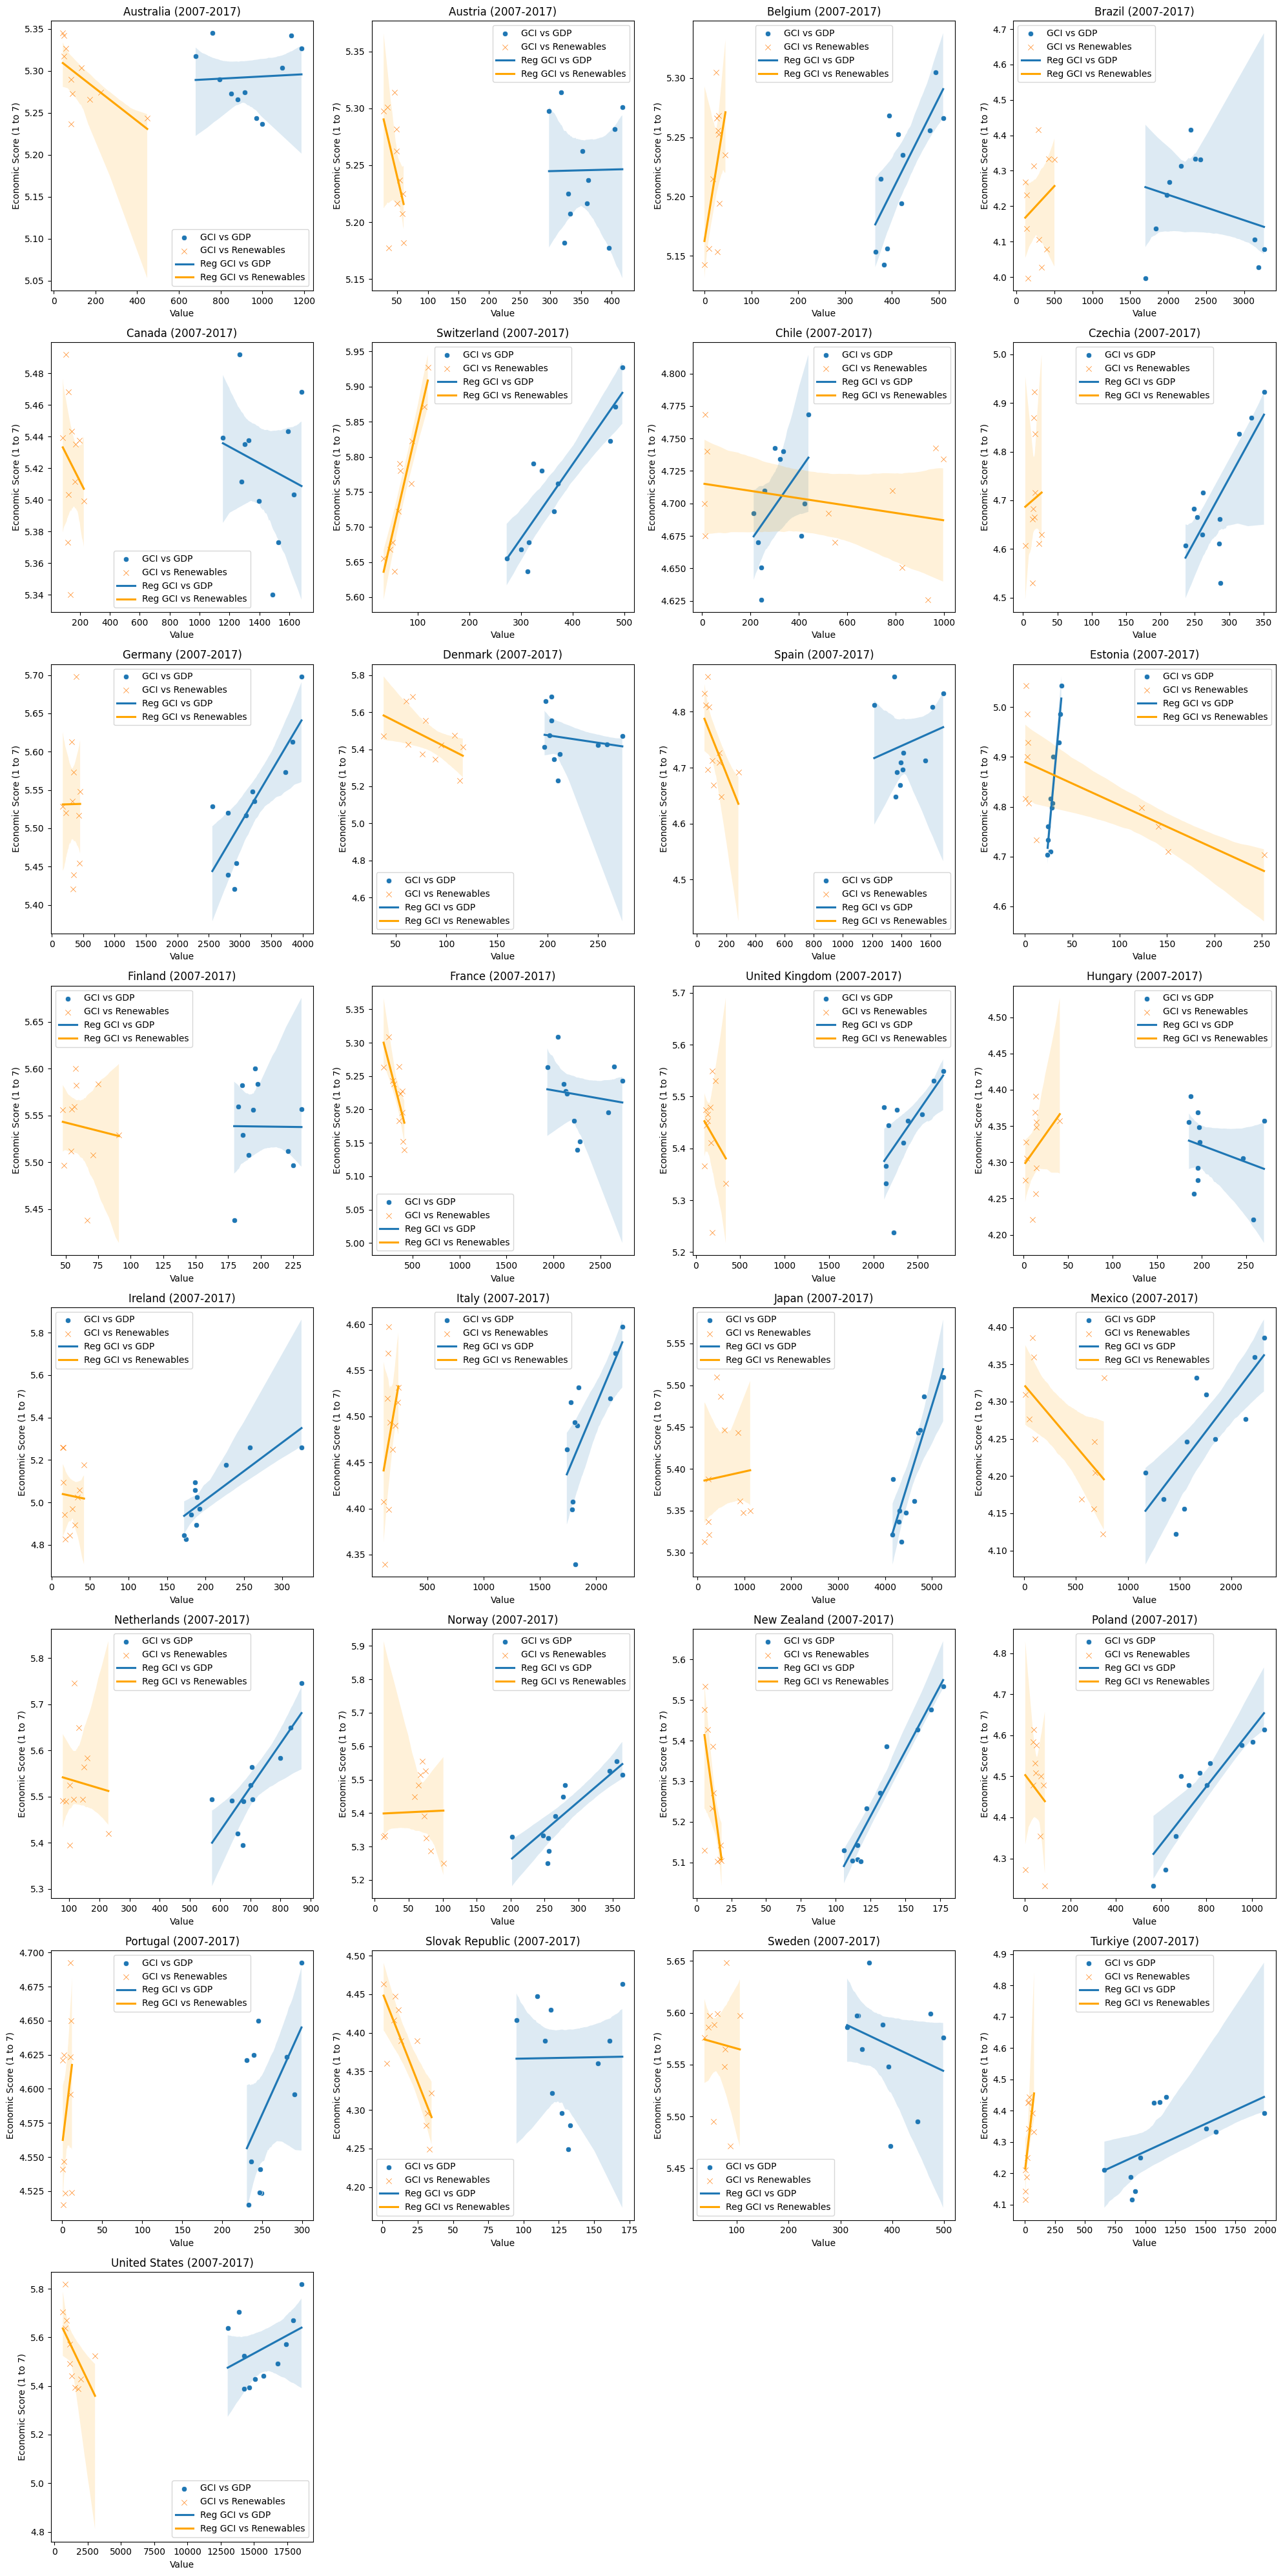

In [556]:
# Définir la taille de la grille
n_countries = len(merged_3df['Economy Name'].unique())
n_cols = 4  # Nombre de colonnes de la grille
n_rows = (n_countries + n_cols - 1) // n_cols  # Calculer le nombre de lignes nécessaires

# Créer une figure et des axes
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Boucle pour chaque pays et tracer les scatter plots
for i, country in enumerate(merged_3df['Economy Name'].unique()):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    
    data = correlation_3df[correlation_3df['Country'] == country]
    sns.scatterplot(x='GDP', y='GCI', data=data, ax=ax, label='GCI vs GDP')
    sns.scatterplot(x='Renewables', y='GCI', data=data, ax=ax, label='GCI vs Renewables', marker='x')
    sns.regplot(x='GDP', y='GCI', data=data, ax=ax, scatter=False, label='Reg GCI vs GDP')
    sns.regplot(x='Renewables', y='GCI', data=data, ax=ax, scatter=False, label='Reg GCI vs Renewables', color='orange')
    
    ax.set_title(f'{country} (2007-2017)')
    ax.set_xlabel('Value')
    ax.set_ylabel('Economic Score (1 to 7)')
    ax.legend()

# Supprimer les axes inutilisés
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

plt.tight_layout()
plt.show()


##### Heatmap des corrélations GDP x GCI x ER #####

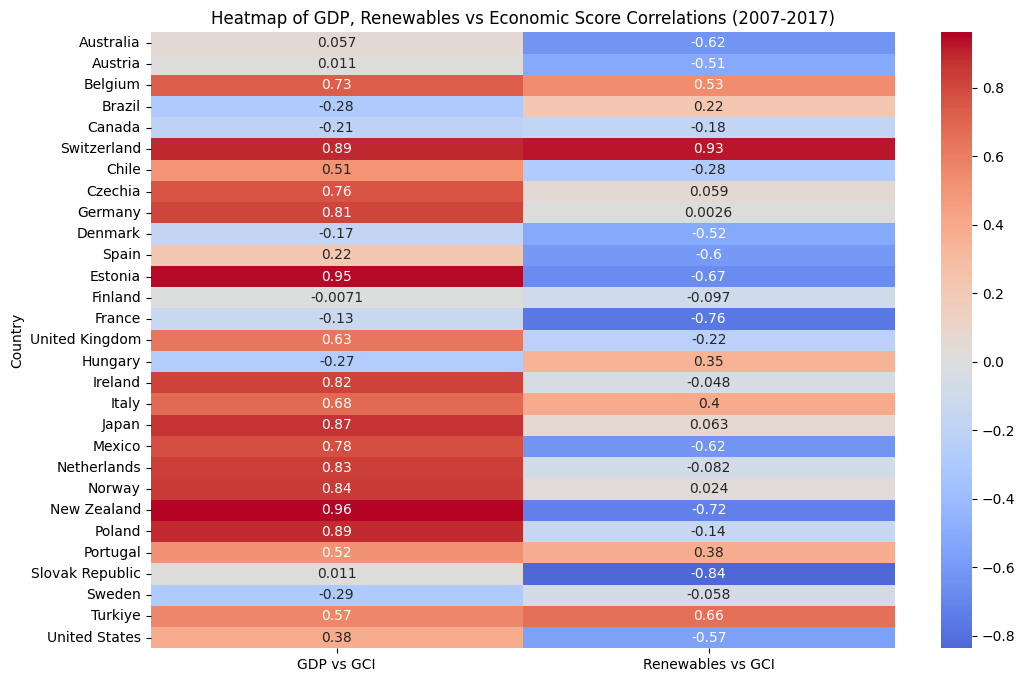

In [557]:
# Calculer les corrélations pour chaque pays
heatmap_data = []

for country in merged_3df['Economy Name'].unique():
    data = correlation_3df[correlation_3df['Country'] == country]
    correlation_gdp_gci = data['GDP'].corr(data['GCI'])
    correlation_renewables_gci = data['Renewables'].corr(data['GCI'])
    heatmap_data.append({
        'Country': country,
        'GDP vs GCI': correlation_gdp_gci,
        'Renewables vs GCI': correlation_renewables_gci
    })

# Convertir en DataFrame
heatmap_df = pd.DataFrame(heatmap_data).set_index('Country')

# Plot de la heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_df, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of GDP, Renewables vs Economic Score Correlations (2007-2017)')
plt.show()
